# Census Income Project
## Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

## Dataset Description
Dataset for 'Census Income' project contains information related to age, work class, education, marital status, occupation, family relationships, race, gender, financial gains and losses, working hours, nationality, income etc.

## Attributes Description
Age: This column represents the age of the individuals in years.

Workclass: It describes the type of employment or work situation of each individual, helping to categorize them into groups like "Private", "Government", "Self-employment", or "Unemployed." 

Fnlwgt (Final Weight): Fnlwgt is a weight assigned to each individual in the dataset, designed to make the data more representative of the entire population. It considers the likelihood of an individual's inclusion in the census, facilitating the accuracy of analyses.

Education: This column specifies the highest level of education attained by each individual, which may include categories such as "High School", "Bachelor's Degree", or "Masters". 

Education_num: Education_num consists of numeric values corresponding to the level of education, providing a quantified representation of the 'Education' column. 

Marital_status: It details the marital status of each individual, categorizing them as "Married", "Never Married," "Divorced", "Widowed", and more. 

Occupation: This column records the occupation or job role of the individual, categorizing them into groups like "Managerial", "Clerical", "Technician", or "Service". 

Relationship: It indicates the person's relationship within their family, with categories such as "Husband", "Wife", "Not-in-family", and "Own-child". 

Race: This column identifies the individual's racial or ethnic background, with common categories like "White", "Black", or "Asian-Pac-Islander". 

Sex: This column represents the gender of the individual, typically categorized as "Male" or "Female".

Capital_gain: It records the capital gains (profits) an individual has earned, often through investments or asset sales. 

Capital_loss: Similar to "Capital_gain" this column indicates capital losses incurred by the individual through investments or asset sales. 

Hours_per_week: It reflects the number of hours an individual works per week in their primary job. 

Native_country: This column identifies the individual's country of origin or nationality. 

Income: It serves as the target variable in the project, typically categorizing individuals into income groups, such as "<=50K" (lower income) or ">50K" (higher income). 

## Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

## Objective:
The objective of this project is to predict whether a person makes over $50K a year on the basis of the details provided in the dataset.

## Features and Target variable for Census Income Prediction:

### Features: 
Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country

### Target variable:
Income

# Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Saving and loading models
import joblib

# Importing Dataset

In [2]:
# Load data from CSV into dataframe
df = pd.read_csv('Census_Income_Dataset.csv')

In [3]:
# Display the first 5 rows of the dataframe
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
# Display the last 5 rows of the dataframe
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

# Exploratory Data Analysis

In [5]:
# Display the shape of the dataframe
df.shape

(32560, 15)

Dataframe has 32560 rows and 15 columns.

In [6]:
# Display the names of the columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
# Display the datatypes of all the columumns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Data Preprocessing

In [8]:
# Checking for if any ' ','NA','-', or '-' exist in dataset.
df.isin([' ','NA','-',' ?']).any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country     True
Income            False
dtype: bool

In 'Workclass', 'Occupation', and 'Native_country' columns, any ' ','?', 'NA', or '-' exist.

In [9]:
# Cheking for which value is present out of these ' ', 'NA', '-', '?'
values_to_check = [' ', 'NA', '-', ' ?']
present_values = []

for value in values_to_check:
    if (df.values == value).any():
        present_values.append(value)
        
present_values

[' ?']

In [10]:
# Checking for the count of '?'
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [11]:
# Replacing '?' with NaN
df = df.replace(' ?', np.NaN)

In [12]:
# Again Checking for if any whitespace,'?' 'NA' or '-' exist in dataset
df.isin([' ','NA','-',' ?']).any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [13]:
# Checking for the duplicated rows in the dataset
df.duplicated().sum()

24

Yes, duplicated rows are present in the dataset.

In [14]:
# Dropping duplicated rows
df.drop_duplicates(keep = 'first', inplace = True)

In [15]:
# Again checking for the duplicated rows in the dataset
df.duplicated().sum()

0

Now, no duplicated rows present in the dataset.

In [16]:
# Checking for the null values in the dataset
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Yes, null values are present 'Workclass', 'Occupation', and 'Native_country' columns.

In [17]:
# Calculating the percentage of missing data for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame to display the results
missing_data_info = pd.DataFrame({'Missing Values': df.isnull().sum(), '% Missing Data': missing_percentage})

# Sorting the missing data information in descending order by '% Missing Data'
missing_data_info = missing_data_info.sort_values(by = '% Missing Data', ascending = False)

# Display the sorted missing data information
print(missing_data_info)

                Missing Values  % Missing Data
Occupation                1843            5.66
Workclass                 1836            5.64
Native_country             582            1.79
Age                          0            0.00
Fnlwgt                       0            0.00
Education                    0            0.00
Education_num                0            0.00
Marital_status               0            0.00
Relationship                 0            0.00
Race                         0            0.00
Sex                          0            0.00
Capital_gain                 0            0.00
Capital_loss                 0            0.00
Hours_per_week               0            0.00
Income                       0            0.00


## Imputing Missing Values

Since, 'Workclass', 'Occupation', and 'Native_country' columns are categorical columns therefore, missing values should be imputed with mode.

In [18]:
# Imputing columns containing null values with mode
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace = True)
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace = True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace = True)

In [19]:
# Again Checking for the null values in the dataset
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Now, no null values present in the dataset.

In [20]:
# Checking for the number of unique values present inside each column
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

Age: 73 unique values (Age).

Workclass: 8 unique values (Workclass).

Fnlwgt: 21647 unique values (Fnlwgt).

Education: 16 unique values (Education).

Education_num: 16 unique values (Education_num).

Marital_status: 7 unique values (Marital_status).

Occupation: 14 unique values (Occupation).

Relationship: 6 unique values (Relationship).

Race: 5 unique values (Race).

Sex: 2 unique values (Sex).

Capital_gain: 119 unique values (Capital_gain).

Capital_loss: 92 unique values (Capital_loss).

Hours_per_week: 94 unique values (Hours_per_week).

Native_country: 41 unique values (Native_country).

Income: 2 unique values (Income).

In [21]:
# Separating numerical columns and categorical columns for further data analysis
categorical_columns = [] # List for storing columns name having categorical data
numerical_columns = [] # List for storing columns name having numerical data

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_columns.append(i)
    elif df[i].dtypes == 'int64':
        numerical_columns.append(i)

In [22]:
# Display numerical columns list
numerical_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [23]:
# Display categorical columns list
categorical_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [24]:
# Display the lengths of both the lists
print("No. numerical columns:", len(numerical_columns))
print("No. categorical_columns:", len(categorical_columns))

No. numerical columns: 6
No. categorical_columns: 9


In [25]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Workclass :
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


Education :
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Marital_status :
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation :
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Relationship :
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Race :
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Sex :
[' Male' ' Female']


Native_country :
[' United-States' ' Cuba' '

Workclass: There are 8 unique values representing different workclasses, including 'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay', and 'Never-worked'.

Education: This column has 16 unique values representing different education levels, including 'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th', 'Preschool', and '12th'.

Marital_status: There are 7 unique values indicating different marital statuses, including 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Never-married', 'Separated', 'Married-AF-spouse', and 'Widowed'.

Occupation: This column contains 14 unique values representing various occupations, including 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Protective-serv', 'Armed-Forces', and 'Priv-house-serv'.

Relationship: There are 6 unique values indicating different types of relationships, including 'Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', and 'Other-relative'.

Race: This column has 5 unique values representing different racial backgrounds, including 'White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', and 'Other'.

Sex: There are 2 unique values representing gender, including 'Male' and 'Female'.

Native_country: There are 41 unique values representing various native countries, including 'United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', and 'Holand-Netherlands'.

Income: This column contains 2 unique values, representing income levels, including '<=50K' and '>50K'.

In [26]:
# Display value count for each unique value present in the categorical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-cleri

Workclass: This column indicates different workclasses. 'Private' has the highest count (24,509 occurrences), followed by 'Self-emp-not-inc' (2,540), 'Local-gov' (2,093), 'State-gov' (1,297), 'Self-emp-inc' (1,116), 'Federal-gov' (960), 'Without-pay' (14), and 'Never-worked' (7).

Education: There are different education levels represented in this column. 'HS-grad' is the most frequent level (10,494 occurrences), followed by 'Some-college' (7,282), 'Bachelors' (5,352), 'Masters' (1,722), 'Assoc-voc' (1,382), '11th' (1,175), 'Assoc-acdm' (1,067), '10th' (933), '7th-8th' (645), 'Prof-school' (576), '9th' (514), '12th' (433), 'Doctorate' (413), '5th-6th' (332), and 'Preschool' (50).

Marital_status: This column represents different marital statuses. 'Married-civ-spouse' is the most common (14,970 occurrences), followed by 'Never-married' (10,666), 'Divorced' (4,441), 'Separated' (1,025), 'Widowed' (993), 'Married-spouse-absent' (418), and 'Married-AF-spouse' (23).

Occupation: There are 14 unique values in this column, with 'Prof-specialty' having the highest count (5,979 occurrences), followed by 'Craft-repair' (4,094), 'Exec-managerial' (4,065), 'Adm-clerical' (3,767), 'Sales' (3,650), 'Other-service' (3,291), 'Machine-op-inspct' (2,000), 'Transport-moving' (1,597), 'Handlers-cleaners' (1,369), 'Farming-fishing' (992), 'Tech-support' (927), 'Protective-serv' (649), 'Priv-house-serv' (147), and 'Armed-Forces' (9).

Relationship: This column contains various types of relationships. 'Husband' is the most common (13,187 occurrences), followed by 'Not-in-family' (8,291), 'Own-child' (5,064), 'Unmarried' (3,445), 'Wife' (1,568), and 'Other-relative' (981).

Race: There are different racial backgrounds represented in this column. 'White' is the most common (27,794 occurrences), followed by 'Black' (3,122), 'Asian-Pac-Islander' (1,038), 'Amer-Indian-Eskimo' (311), and 'Other' (271).

Sex: This column contains two unique values. 'Male' is the most frequent (21,774 occurrences), followed by 'Female' (10,762).

Native_country: There are 41 unique values representing various native countries. 'United-States' has the highest count (29,734 occurrences), followed by 'Mexico' (639), 'Philippines' (198), 'Germany' (137), 'Canada' (121), 'Puerto-Rico' (114), 'El-Salvador' (106), 'India' (100), 'Cuba' (95), 'England' (90), 'Jamaica' (81), 'South' (80), 'China' (75), 'Italy' (73), 'Dominican-Republic' (70), 'Vietnam' (67), 'Japan' (62), 'Guatemala' (62), 'Poland' (60), 'Columbia' (59), 'Taiwan' (51), 'Haiti' (44), 'Iran' (43), 'Portugal' (37), 'Nicaragua' (34), 'Peru' (31), 'France' (29), 'Greece' (29), 'Ecuador' (28), 'Ireland' (24), 'Hong' (20), 'Cambodia' (19), 'Trinadad&Tobago' (19), 'Laos' (18), 'Thailand' (18), 'Yugoslavia' (16), 'Outlying-US(Guam-USVI-etc)' (14), 'Honduras' (13), 'Hungary' (13), 'Scotland' (12), and 'Holand-Netherlands' (1).

Income: This column contains two unique values, '<=50K' (24,697 occurrences) and '>50K' (7,839 occurrences).

In [27]:
# Display the unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Age :
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Fnlwgt :
[ 83311 215646 234721 ...  34066  84661 257302]


Education_num :
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Capital_gain :
[    0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386  7298
  1409  3674  1055  3464  2050  2176  2174   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678

Age: This column contains a diverse range of ages, including values from 17 to 90.

Fnlwgt: This column represents a wide range of values with various frequencies.

Education_num: There are 16 unique values in this column, indicating the number associated with different education levels.

Capital_gain: This column contains various capital gain values, including '0', '14084', '5178', '5013', and many others.

Capital_loss: There is a diverse range of values in this column, including '0', '2042', '1408', '1902', '1573', and more.

Hours_per_week: This column has a diverse range of values representing the number of hours worked per week.

In [28]:
# Display the value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


40    15203
50     2817

Age: This column represents the age of individuals. The most frequent age is 36, with 898 occurrences. This is followed by 31 (888), 34 (886), 23 (876), 33 (875), and so on. The least frequent ages are 83 (6), 88 (3), 85 (3), 86 (1), and 87 (1).

Fnlwgt: This column contains a diverse range of values, with various frequencies. For example, '123011' occurs 13 times, '164190' occurs 13 times, '203488' occurs 13 times, and so on.

Education_num: There are 16 unique values in this column representing education levels. The most frequent level is 9, with 10,494 occurrences, followed by 10 (7,282), 13 (5,352), 14 (1,722), and so on.

Capital_gain: This column contains a diverse range of capital gain values. The most frequent is '0', with 29,825 occurrences, followed by '15024' (347), '7688' (284), '7298' (246), and so on.

Capital_loss: There are 92 unique values in this column, representing capital loss. The most frequent is '0', with 31,017 occurrences, followed by '1902' (202), '1977' (168), '1887' (159), and '1848' (51).

Hours_per_week: This column represents the number of hours worked per week. The most frequent is '40', with 15,203 occurrences, followed by '50' (2,817), '45' (1,823), '60' (1,475), and '35' (1,296). There are a total of 94 unique values in this column.

In [29]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [30]:
# Display summary statistics of the dataframe
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

Age: The average age of customers is approximately 38.59 years, with a standard deviation of about 13.64. The ages range from 17 to 90, indicating a diverse age group of policyholders.

Fnlwgt: The average final weight is approximately 189,784, with a standard deviation of about 105,563. The final weight values vary widely, ranging from 12,285 to 1,484,705.

Education_num: The average education number is approximately 10.08, with a standard deviation of about 2.57. Education numbers range from 1 to 16, representing different education levels.

Capital_gain: The average capital gain is approximately 1,078.41, with a standard deviation of about 7,388.07. Capital gain values vary significantly, with a minimum of 0 and a maximum of 99,999.

Capital_loss: The average capital loss is approximately 87.37, with a standard deviation of about 403.11. Capital loss values range from 0 to 4,356.

Hours_per_week: The average number of hours worked per week is approximately 40.44, with a standard deviation of about 12.35. The number of hours worked per week varies, with a minimum of 1 and a maximum of 99.

In [31]:
# Display summary statistics for categorical columns
df.describe(include = 'O')

Workclass Education       Marital_status       Occupation Relationship  \
count      32536     32536                32536            32536        32536   
unique         8        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       24509     10494                14970             5979        13187   

          Race    Sex  Native_country  Income  
count    32536  32536           32536   32536  
unique       5      2              41       2  
top      White   Male   United-States   <=50K  
freq     27794  21774           29734   24697

Workclass: There are 8 unique values in the 'Workclass' column. 'Private' is the most frequent workclass, appearing 24,509 times. Workclass can be a factor influencing individuals' income and eligibility for certain policies.

Education: There are 16 unique values in the 'Education' column. 'HS-grad' is the most frequent education level, occurring 10,494 times. Education level can impact policyholders' understanding of insurance terms and choices.

Marital_status: There are 7 unique values in the 'Marital_status' column. 'Married-civ-spouse' is the most frequent marital status, appearing 14,970 times. Marital status can be relevant in the context of joint policies and beneficiaries.

Occupation: There are 14 unique values in the 'Occupation' column. 'Prof-specialty' is the most frequent occupation, occurring 5,979 times. Occupation can be a factor in determining policy rates and coverage, especially for high-risk jobs.

Relationship: There are 6 unique values in the 'Relationship' column. 'Husband' is the most frequent relationship status, appearing 13,187 times. Relationship status can affect beneficiary designations and joint policies.

Race: There are 5 unique values in the 'Race' column. 'White' is the most frequent race, occurring 27,794 times. Race can be considered in the context of demographic and risk analysis.

Sex: There are 2 unique values in the 'Sex' column. 'Male' is the most frequent gender, appearing 21,774 times. Gender can be a demographic factor considered in insurance policies.

Native_country: There are 41 unique values in the 'Native_country' column. 'United-States' is the most frequent native country, occurring 29,734 times. Native country can be a factor in risk assessment and international policies.

Income: There are 2 unique values in the 'Income' column. '<=50K' is the most frequent income level, appearing 24,697 times. Income is a key factor in determining eligibility and policy rates.

# Data Visualization

In [32]:
sns.set(style = 'whitegrid')

## Univariate Analysis

### Count Plot

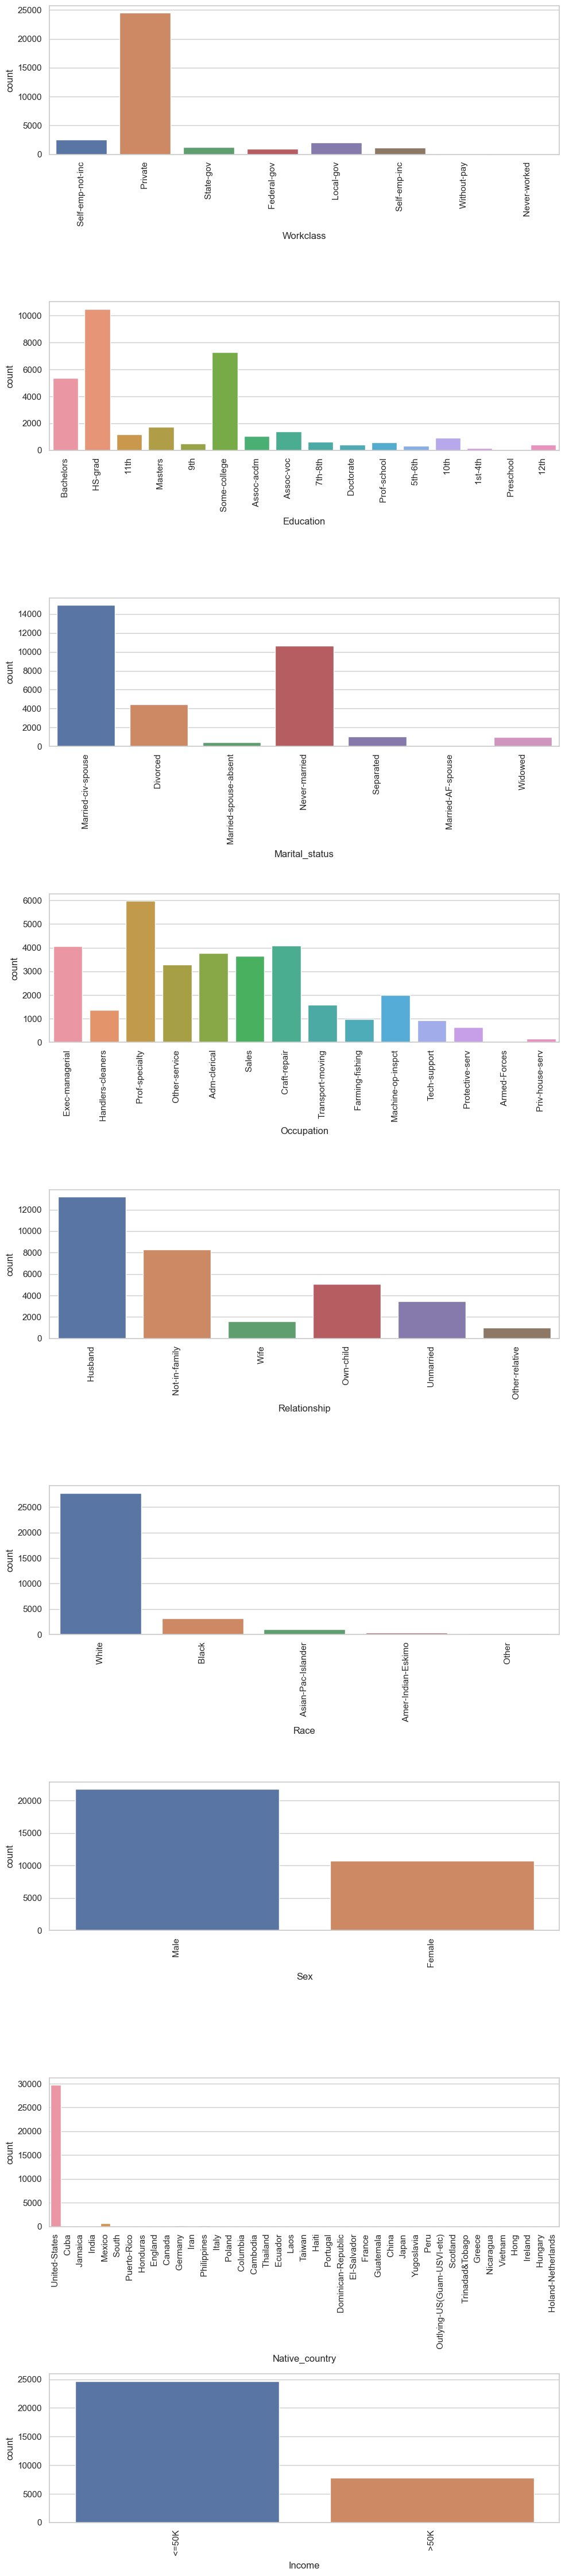

In [33]:
# Univariate analysis using count plot 
columns_to_plot = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 
                   'Income']
rows = 9
columns = 1
plt.figure(figsize = (10, 45))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.xticks(rotation = 90)
    plt.tight_layout()

plt.show()

### Observations:

#### Workclass
'Private' has the highest count (24,509 occurrences), followed by 'Self-emp-not-inc' (2,540), 'Local-gov' (2,093), 'State-gov' (1,297), 'Self-emp-inc' (1,116), 'Federal-gov' (960), 'Without-pay' (14), and 'Never-worked' (7).

#### Education
'HS-grad' is the most frequent level (10,494 occurrences), followed by 'Some-college' (7,282), 'Bachelors' (5,352), 'Masters' (1,722), 'Assoc-voc' (1,382), '11th' (1,175), 'Assoc-acdm' (1,067), '10th' (933), '7th-8th' (645), 'Prof-school' (576), '9th' (514), '12th' (433), 'Doctorate' (413), '5th-6th' (332), and 'Preschool' (50).

#### Marital_status
'Married-civ-spouse' is the most common (14,970 occurrences), followed by 'Never-married' (10,666), 'Divorced' (4,441), 'Separated' (1,025), 'Widowed' (993), 'Married-spouse-absent' (418), and 'Married-AF-spouse' (23).

#### Occupation
'Prof-specialty' having the highest count (5,979 occurrences), followed by 'Craft-repair' (4,094), 'Exec-managerial' (4,065), 'Adm-clerical' (3,767), 'Sales' (3,650), 'Other-service' (3,291), 'Machine-op-inspct' (2,000), 'Transport-moving' (1,597), 'Handlers-cleaners' (1,369), 'Farming-fishing' (992), 'Tech-support' (927), 'Protective-serv' (649), 'Priv-house-serv' (147), and 'Armed-Forces' (9).

#### Relationship
'Husband' is the most common (13,187 occurrences), followed by 'Not-in-family' (8,291), 'Own-child' (5,064), 'Unmarried' (3,445), 'Wife' (1,568), and 'Other-relative' (981).

#### Race
'White' is the most common (27,794 occurrences), followed by 'Black' (3,122), 'Asian-Pac-Islander' (1,038), 'Amer-Indian-Eskimo' (311), and 'Other' (271).

#### Sex
'Male' is the most frequent (21,774 occurrences), followed by 'Female' (10,762).

#### Native_country
'United-States' has the highest count (29,734 occurrences), followed by 'Mexico' (639), 'Philippines' (198), 'Germany' (137), 'Canada' (121), 'Puerto-Rico' (114), 'El-Salvador' (106), 'India' (100), 'Cuba' (95), 'England' (90), 'Jamaica' (81), 'South' (80), 'China' (75), 'Italy' (73), 'Dominican-Republic' (70), 'Vietnam' (67), 'Japan' (62), 'Guatemala' (62), 'Poland' (60), 'Columbia' (59), 'Taiwan' (51), 'Haiti' (44), 'Iran' (43), 'Portugal' (37), 'Nicaragua' (34), 'Peru' (31), 'France' (29), 'Greece' (29), 'Ecuador' (28), 'Ireland' (24), 'Hong' (20), 'Cambodia' (19), 'Trinadad&Tobago' (19), 'Laos' (18), 'Thailand' (18), 'Yugoslavia' (16), 'Outlying-US(Guam-USVI-etc)' (14), 'Honduras' (13), 'Hungary' (13), 'Scotland' (12), and 'Holand-Netherlands' (1).

#### Income
'<=50K' (24,697 occurrences) and '>50K' (7,839 occurrences).

### Pie Chart

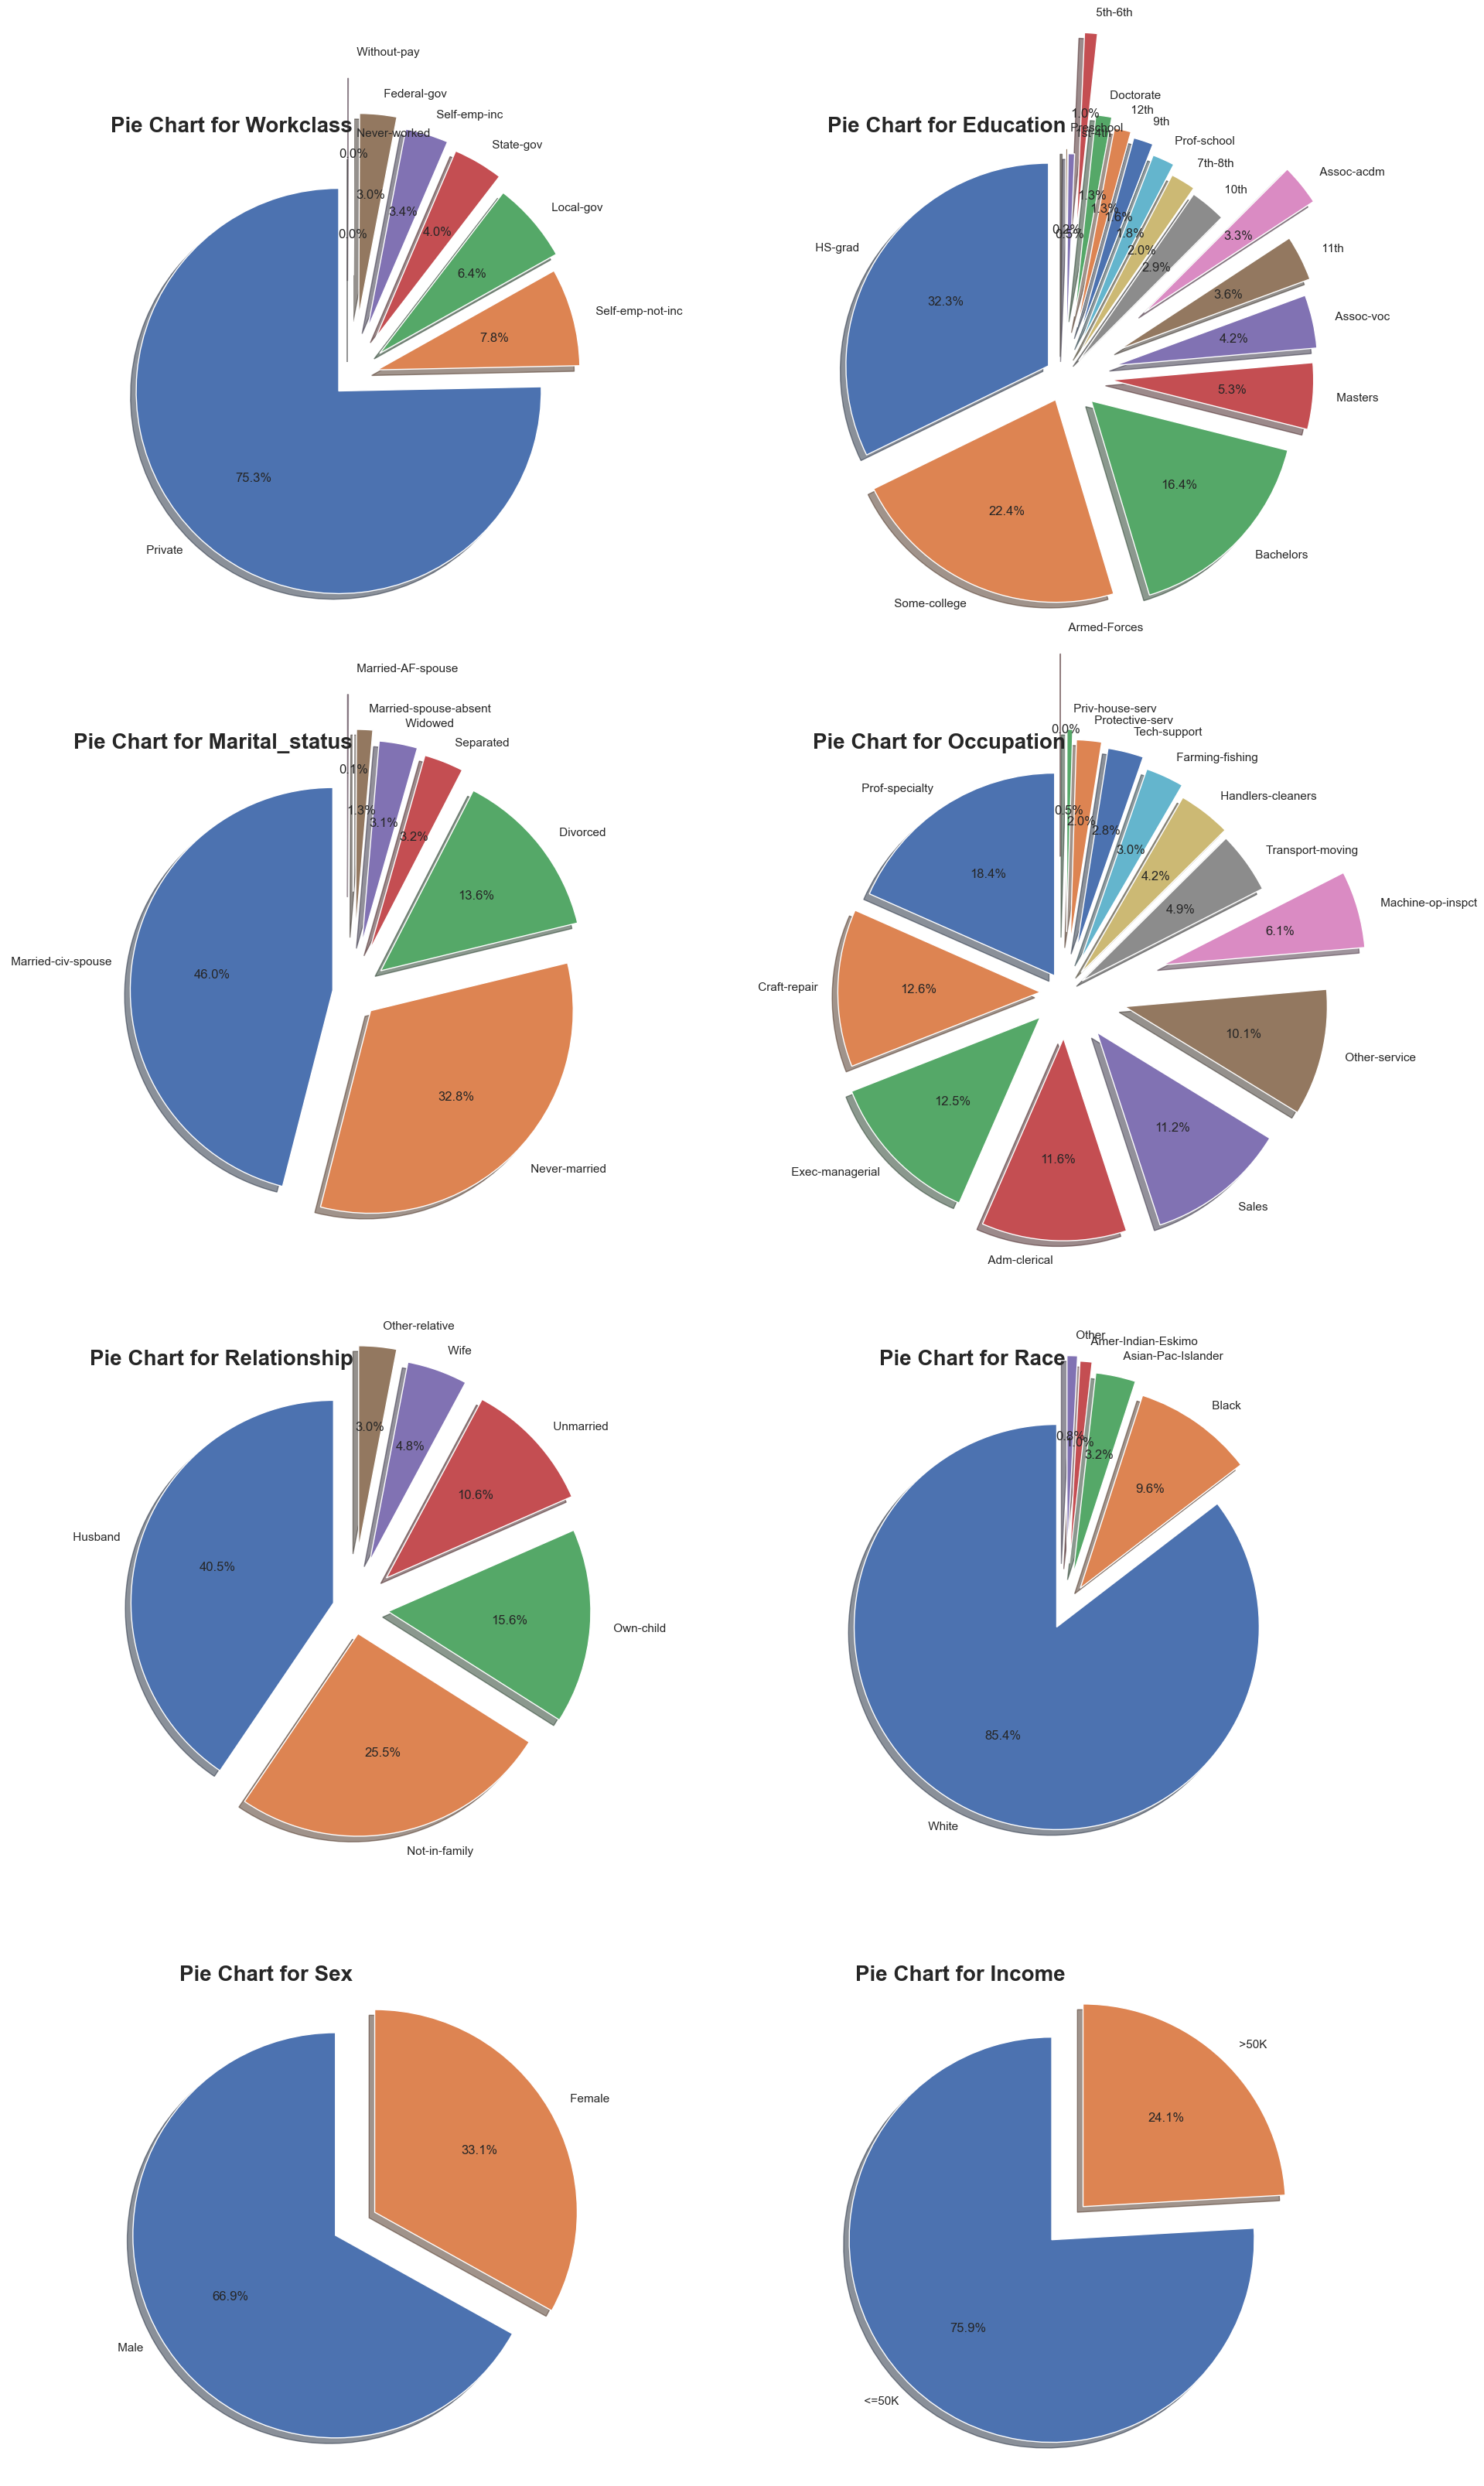

In [34]:
# Univariate analysis using pie chart 
columns_to_plot = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Income']
rows = 5
columns = 2
plt.figure(figsize = (20, 40))

custom_explode =  [0.1, 0.125, 0.175, 0.225, 0.25, 0.3, 0.5, 0.1, 0.125, 0.175, 0.225, 0.25, 0.3, 0.7, 0.1, 0.125, 0.175, 0.225,
                   0.25, 0.3, 0.315]

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    length = df[columns_to_plot[i]].nunique()
    c_explode = custom_explode[0:length]
    category_counts = df[columns_to_plot[i]].value_counts()
    plt.title("Pie Chart for " + columns_to_plot[i])
    plt.pie(category_counts, labels = category_counts.index, explode = c_explode, autopct = '%1.1f%%', startangle = 90, shadow = True)
    plt.title("Pie Chart for " + columns_to_plot[i], fontsize = 20, fontweight = 'bold', va = 'top', ha = 'right')
    
plt.tight_layout()
plt.show()

### Observations:
#### Workclass 
Private workclass constitutes the majority at 75.3%, followed by Self-emp-not-inc at 7.8%. The other workclasses include Local-gov (6.4%), State-gov (4.0%), Self-emp-inc (3.4%), Federal-gov (3.0%), Without-pay (0.0%), and Never-worked (0.0%).

#### Education
HS-grad is the most common education level at 32.3%, followed by Some-college (22.4%) and Bachelors (16.5%). Masters (5.3%) and Assoc-voc (4.2%) also make up a significant portion, while other education levels have lower representation.

#### Marital_status 
Married-civ-spouse is the most prevalent marital status at 46.0%, followed by Never-married (32.8%) and Divorced (13.7%). Other marital statuses, such as Separated, Widowed, Married-spouse-absent, and Married-AF-spouse, have lower percentages.

#### Occupation 
Prof-specialty is the most common occupation at 18.4%, followed by Craft-repair (12.6%), and Exec-managerial (12.5%). Adm-clerical and Sales occupations are also significant, each around 11.6%, while other occupations have lower representation.

#### Relationship
The Husband category has the highest percentage at 40.5%, followed by Not-in-family (25.5%) and Own-child (15.6%). Unmarried (10.6%), Wife (4.8%), and Other-relative (3.0%) are also present.

#### Race
White is the most prevalent race at 85.4%, followed by Black (9.6%), Asian-Pac-Islander (3.2%), Amer-Indian-Eskimo (1.0%), and Other (0.8%).

#### Sex
There is a gender imbalance, with 66.9% of individuals being male and 33.1% being female.

#### Income 
The dataset is skewed towards incomes less than or equal to 50K, with 75.9% falling in this category, and 24.1% earning more than 50K.

### Histogram

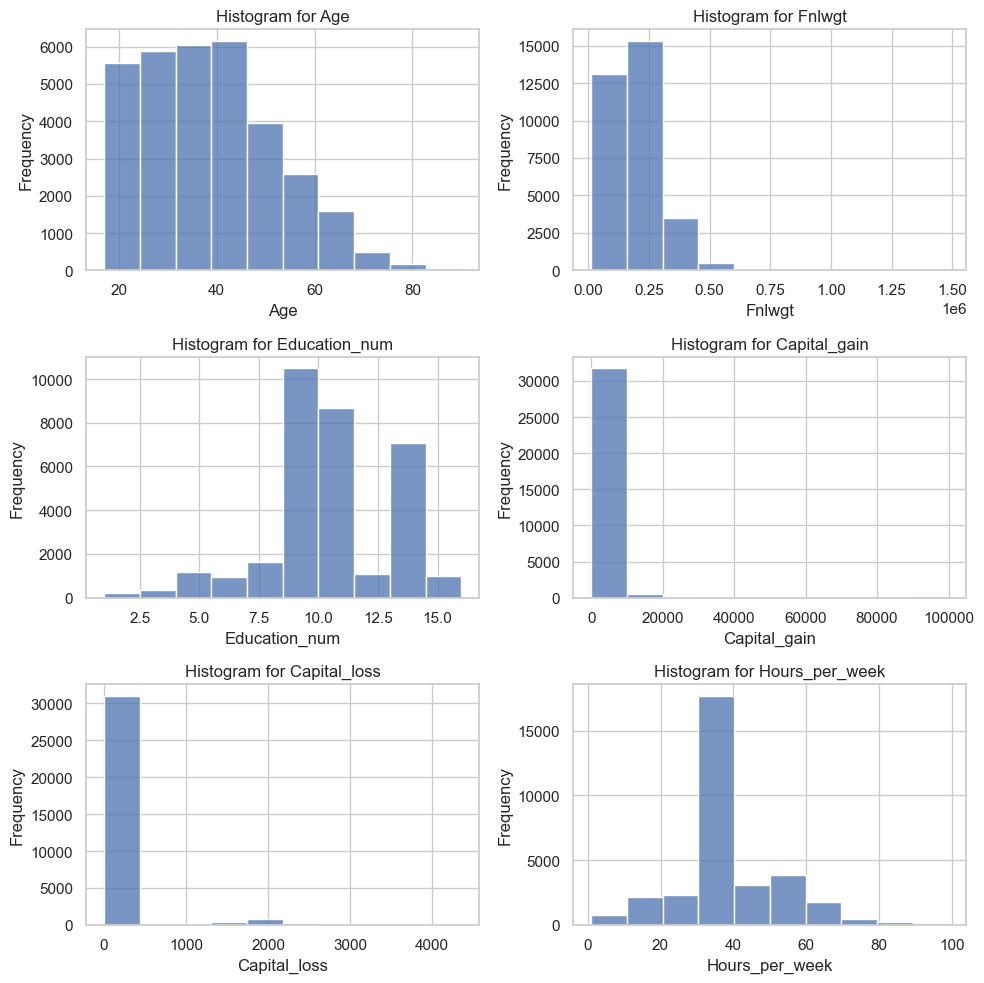

In [35]:
# Univariate analysis using histogram 
columns_to_plot = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

rows = 3
columns = 2

plt.figure(figsize = (10, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Observations:
#### Age
The age of individuals in the dataset spans from 17 to 90, with a median age of 37. The histogram displays a relatively symmetric distribution, peaking in the mid-30s to early 40s, indicating that the majority of individuals fall within this age range. While there's diversity in ages, there are fewer individuals at the extremes, resulting in a somewhat bell-shaped curve.

#### Fnlwgt
The 'Fnlwgt' column represents weight values, ranging from 12,285 to 1,484,705. The mode occurs around 123,011, indicating a common weight pattern. The distribution doesn't follow a clear bell-shaped curve but exhibits a mode-centric pattern, suggesting that specific weight values occur more frequently, while other values are less common.

#### Education_num
Education numbers range from 1 to 16, indicating various levels of education. The mode at 9 suggests a prevalent education level. The histogram shape doesn't follow a perfect bell curve but instead highlights that particular education levels are more frequent than others, with 9 being a prominent peak.

#### Capital_gain
The 'Capital_gain' column indicating that a significant proportion of individuals have no capital gain. However, the data ranges from 0 to 99,999, showing notable variability. The distribution is right-skewed, with a long tail towards higher capital gains, indicating that while most individuals have no capital gain, a few have substantial gains.

#### Capital_loss
The 'Capital_loss' column indicating that many individuals experience no capital loss. However, the data ranges from 0 to 4,356, demonstrating variability. The distribution is also right-skewed, with a few individuals experiencing substantial capital losses while most have none.

#### Hours_per_week
The 'Hours_per_week' column indicates the number of hours individuals work per week. The mode is around 40, suggesting that a common workweek duration. The data spans from 1 to 99 hours per week, indicating a variety of working hour choices. The histogram displays a peak at 40 hours, reflecting the typical full-time work schedule, but it also shows variation, with people working both shorter and longer hours.

### Violin Plot

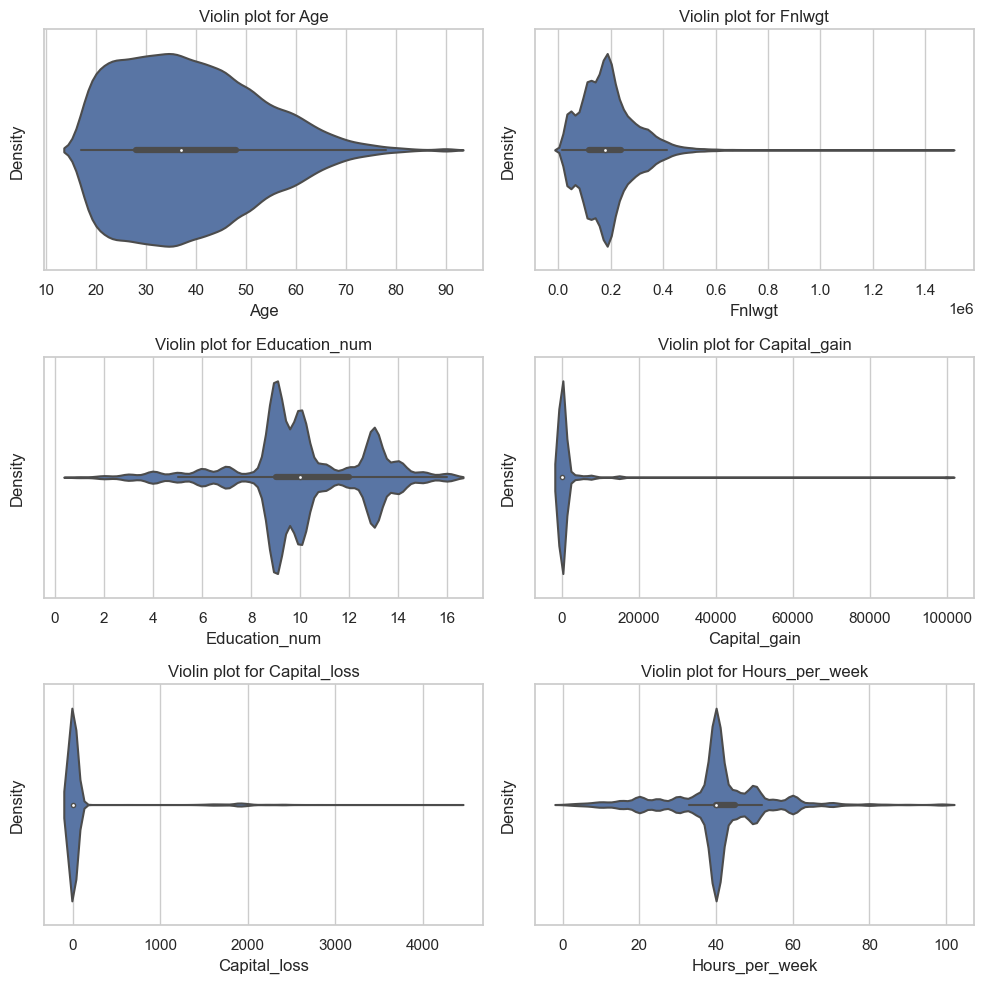

In [36]:
# Univariate analysis using violin plot
columns_to_plot = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

rows = 3
columns = 2

plt.figure(figsize = (10, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.violinplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Violin plot for " + columns_to_plot[i])
    plt.ylabel("Density")
    plt.tight_layout()

plt.show()

### Observations:
#### Age
The violin plot of age shows a central peak in the mid-30s to early 40s, indicating that most individuals fall within this age range.

#### Fnlwgt
In the Fnlwgt violin plot, a mode around 123,011 suggests a common weight pattern, though the distribution doesn't follow a traditional shape.

#### Education_num
Education levels, represented in the violin plot, feature a prominent peak at 9, indicating a prevalent level. The shape deviates from a typical bell curve.

#### Capital_gain
The Capital_gain violin plot highlights that most individuals have no capital gain, but there's notable variability, with a right-skewed distribution towards higher gains.

#### Capital_loss
The Capital_loss violin plot indicates that many individuals have no capital loss, with a right-skewed shape, featuring a few individuals experiencing substantial losses.

#### Hours_per_week
In the Hours_per_week violin plot, there's a peak around 40 hours, representing a common workweek duration, but it also reveals variation in working hours.

## Bivariate Analysis

### Count plot

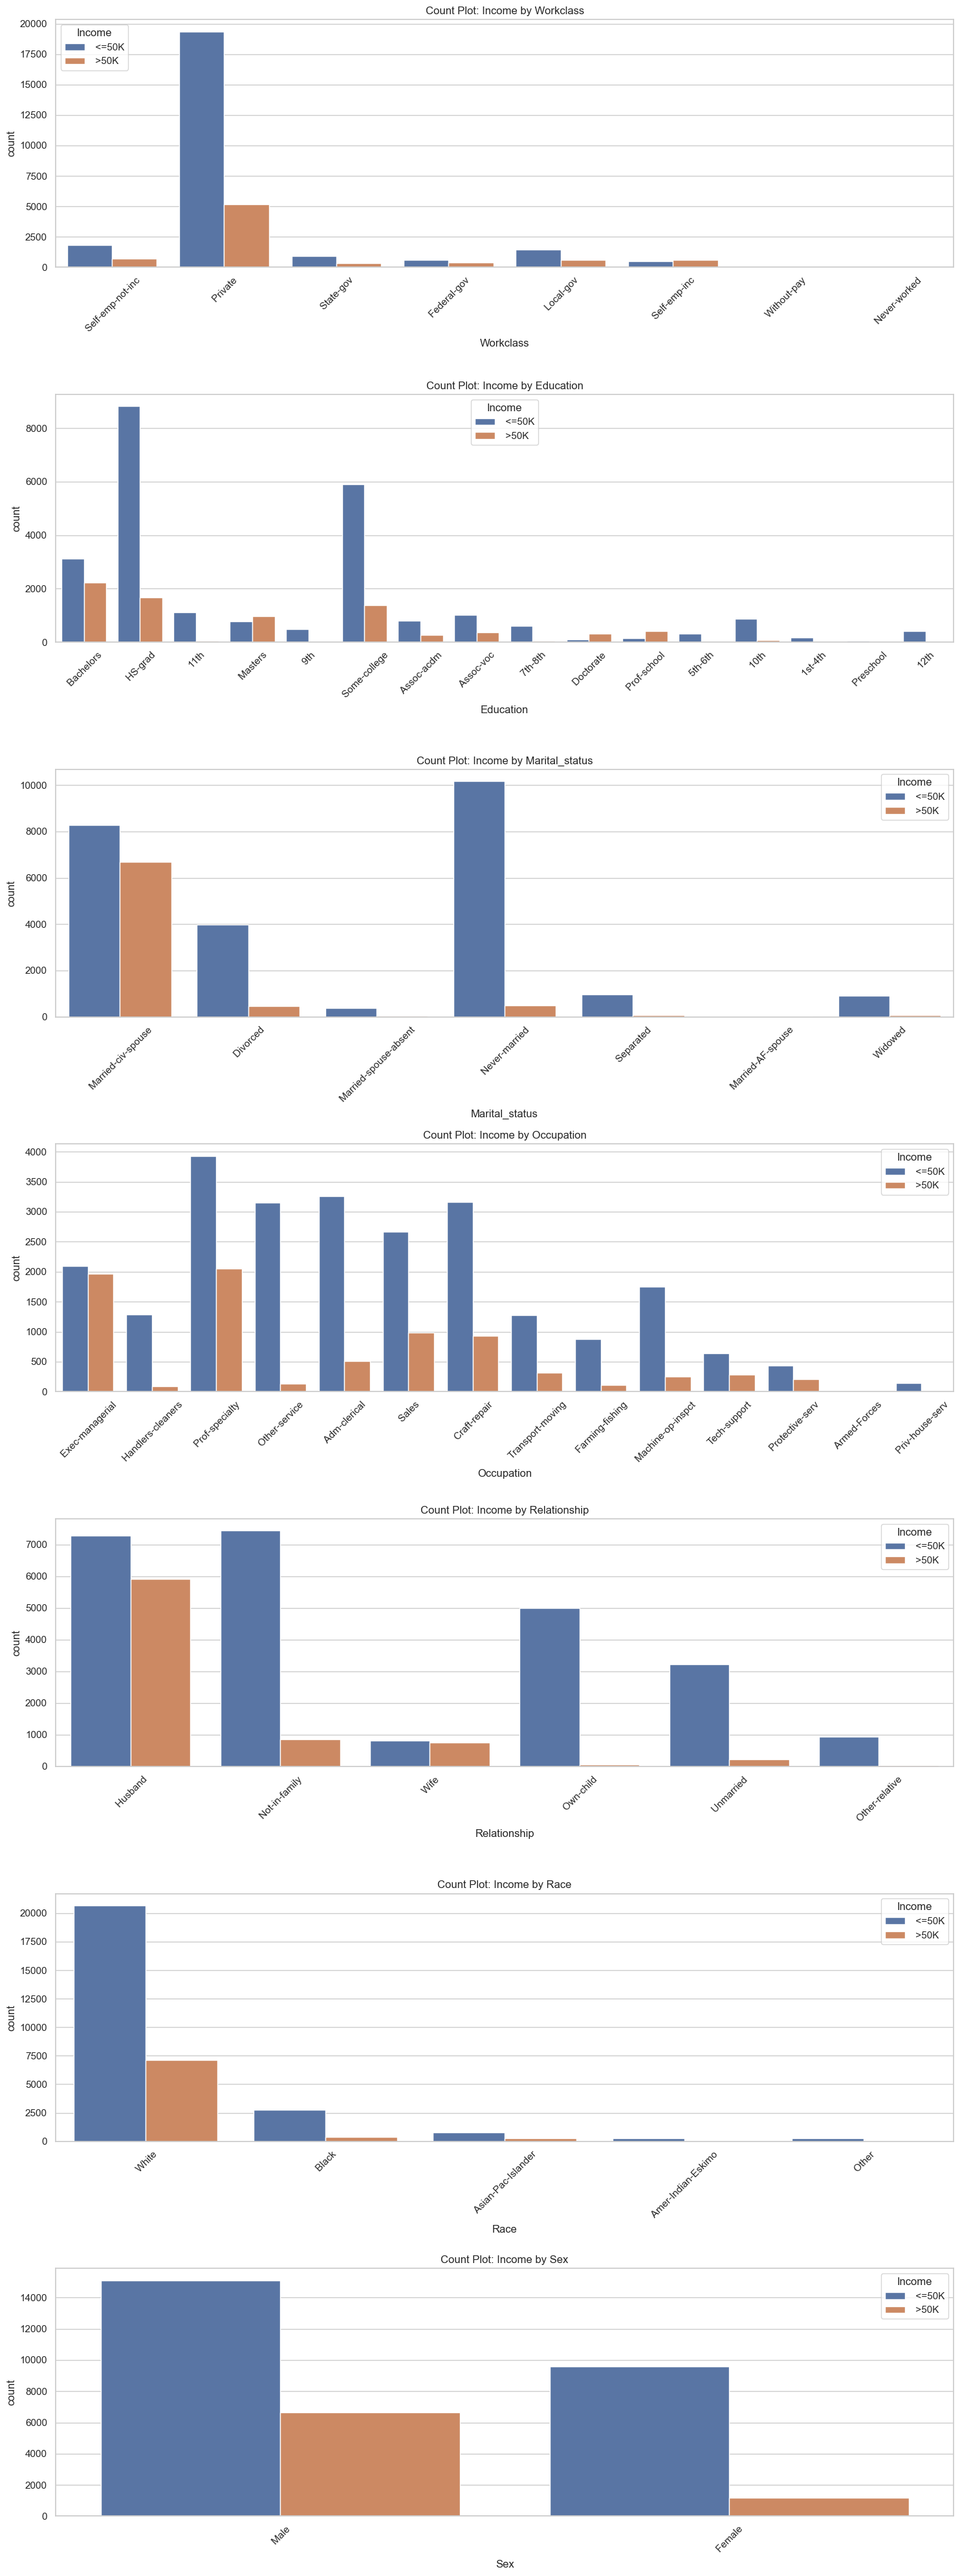

In [37]:
# Columns to include in count plots
columns_to_plot = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex']

rows = 7
columns = 1 

plt.figure(figsize = (15, 40))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.countplot(x = columns_to_plot[i], hue = 'Income', data = df)
    plt.title("Count Plot: Income by " + columns_to_plot[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

plt.show()

### Observations:
#### Income by Workclass
'Private' workclass has the most individuals, with a mix of income levels.
'Self-emp-inc' has a balanced distribution, while 'Without-pay' has fewer individuals.

#### Income by Education
'HS-grad' dominates, with varied income distributions.
'Doctorate,' 'Masters,' and 'Prof-school' have higher >50K earners.

#### Income by Marital Status
'Married-civ-spouse' is balanced, while 'Never-married' leans towards <=50K.
'Divorced' and 'Separated' have more <=50K earners.

#### Income by Occupation
'Craft-repair' and 'Exec-managerial' are balanced.
'Handlers-cleaners' and 'Priv-house-serv' have more <=50K earners.

#### Income by Relationship
'Husband' and 'Wife' relationships are balanced.
'Not-in-family' and 'Unmarried' lean towards <=50K.

#### Income by Race
'White' shows a balanced distribution.
Other races tend to have more <=50K earners.

#### Income by Gender
'Male' is balanced.
'Female' has more individuals earning <=50K.

### Bar plot

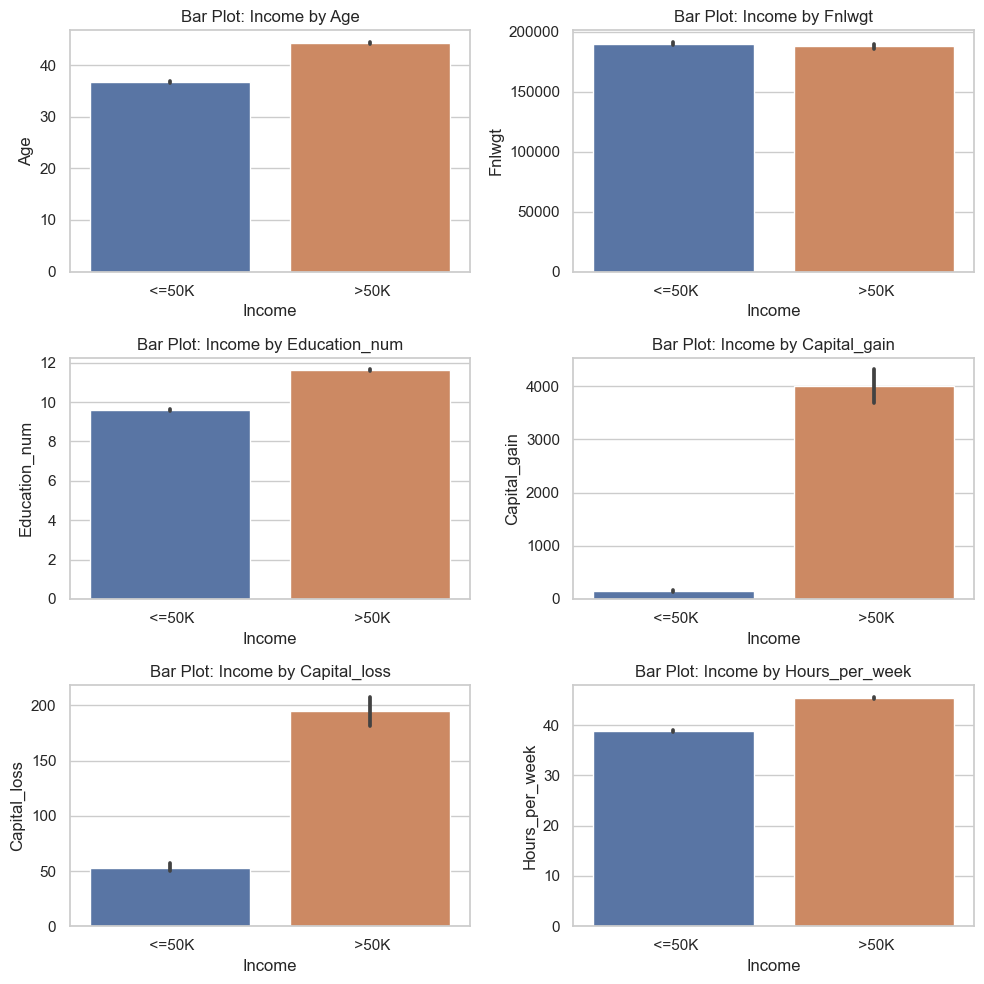

In [38]:
# Bivariate analysis using barplot
columns_to_plot = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

rows = 3
columns = 2

plt.figure(figsize = (10, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x = 'Income', y = columns_to_plot[i], data = df)
    plt.title("Bar Plot: Income by " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:

#### Income by Age
Age ranges from 17 to 90 years. A pronounced trend is visible, with younger individuals, primarily in their early 20s, more likely to earn less than or equal to 50K. As age increases, there's a noticeable drop in the number of individuals earning above 50K, especially among the older age groups.

#### Income by Fnlwgt
There is no clear pattern or evident correlation between Fnlwgt and income levels.

#### Income by Education_num
Education numbers, representing different levels of education, range from 1 to 16. The most common number is 9, corresponding to 'HS-grad'. Despite variations in education levels, the majority of individuals tend to earn less than or equal to 50K.

#### Income by Capital_gain
Most individuals have no recorded capital gains, and those who do tend to earn more than 50K. The data distribution is right-skewed, indicating that while most individuals have no capital gain, a few have substantial gains.

#### Income by Capital_loss
A significant number of individuals experience no capital loss. Among those with losses, they are more likely to earn less than or equal to 50K. Similar to capital gains, the data follows a right-skewed distribution, with a few individuals experiencing significant capital losses.

#### Income by Hours_per_week
The majority of individuals work around 40 hours per week, indicating a standard full-time work schedule. While 40 hours is the mode, there is variability in working hours, with individuals working both shorter and longer hours. Those working longer hours are more likely to have higher incomes.

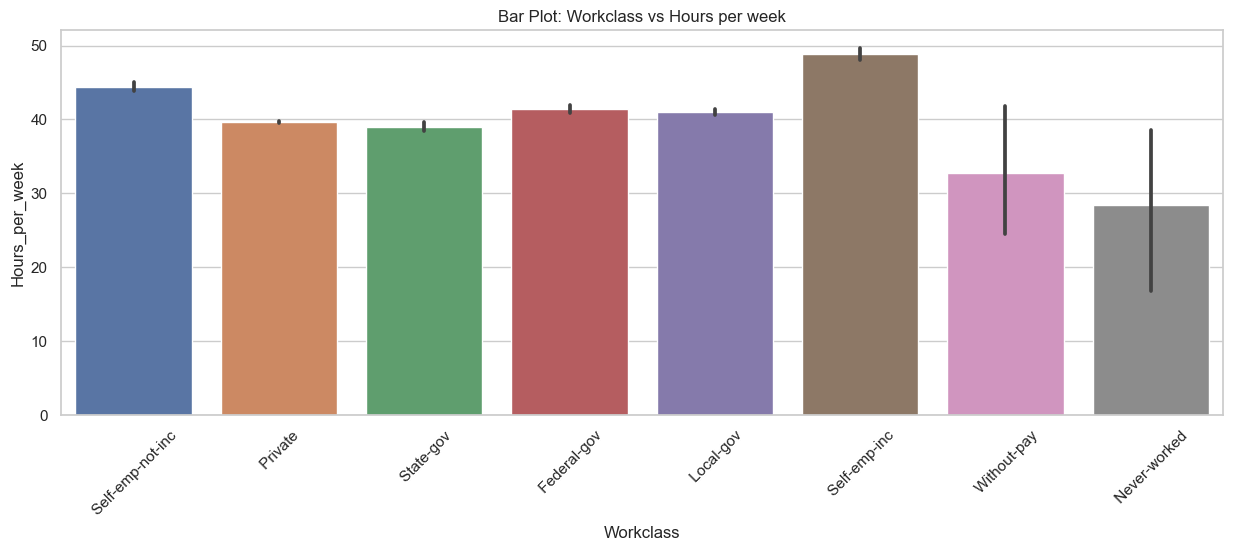

In [39]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Workclass', y = 'Hours_per_week', data = df)
plt.title("Bar Plot: Workclass vs Hours per week")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Workclass vs Hours_per_week
The bar plot for 'Workclass' vs 'Hours_per_week' shows distinct work hour patterns among various workclasses. The 'Private' workclass tends to work more hours on average, while government-related workclasses ('Federal-gov', 'Local-gov', 'State-gov') typically work fewer hours, often conforming to standard government job structures. Self-employed individuals in 'Self-emp-inc' and 'Self-emp-not-inc' exhibit variable work hours, reflecting the flexibility of self-employment. On the other hand, 'Never-worked' and 'Without-pay' workclasses work very few hours or none at all, signaling limited or unpaid employment in these categories.

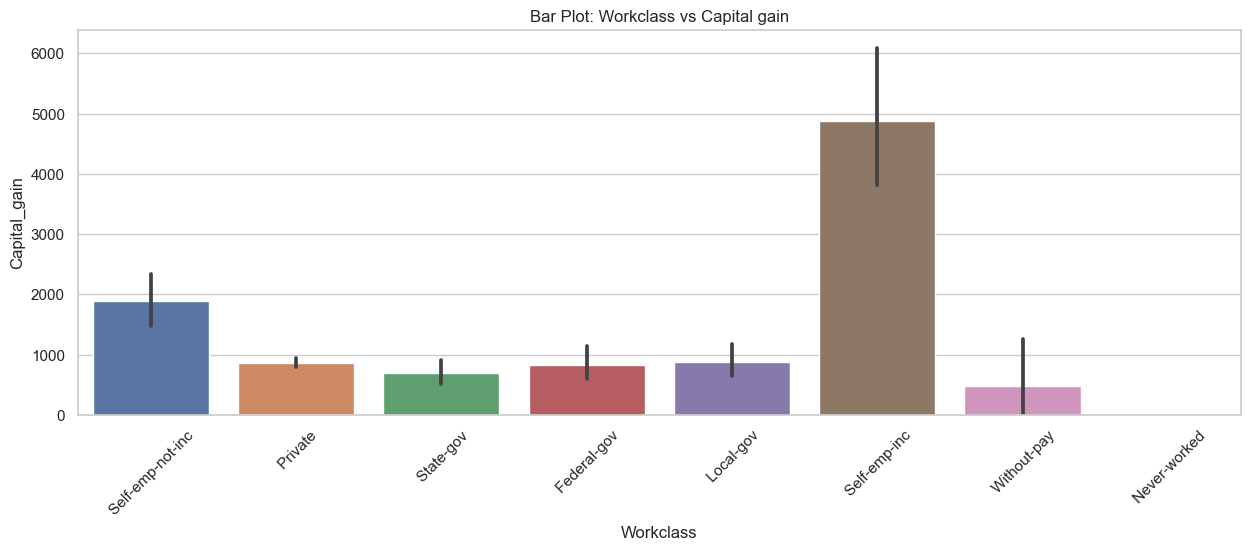

In [40]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Workclass', y = 'Capital_gain', data = df)
plt.title("Bar Plot: Workclass vs Capital gain")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Workclass vs Capital_gain
The bar plot for 'Workclass' vs. 'Capital_gain' reveals distinctive patterns in capital gains among various workclasses. 'Private' employees exhibit higher capital gains on average, likely due to the variety of job types and positions within this sector. In contrast, government-related workclasses ('Federal-gov', 'Local-gov', 'State-gov') tend to report lower capital gains, aligning with standard government job structures. Self-employed individuals in 'Self-emp-inc' and 'Self-emp-not-inc' showcase varying capital gains, mirroring the versatility of self-employment. 'Never-worked' and 'Without-pay' workclasses have minimal or zero capital gains, reflecting limited or unpaid employment in these categories.

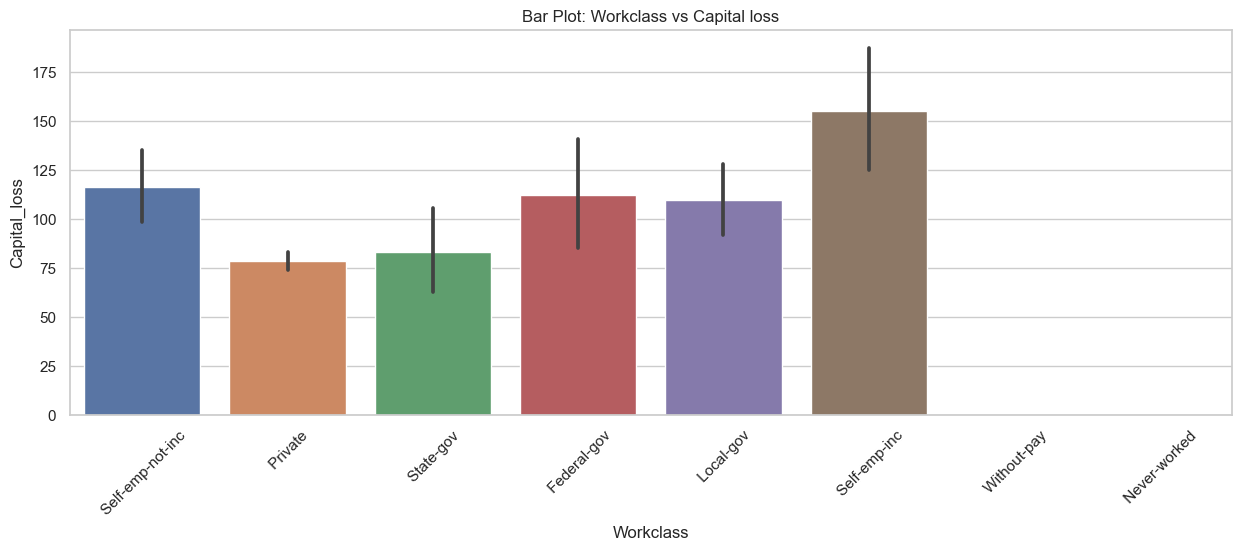

In [41]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Workclass', y = 'Capital_loss', data = df)
plt.title("Bar Plot: Workclass vs Capital loss")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Workclass vs Capital_loss
The bar plot for 'Workclass' vs 'Capital_loss' unveils distinct patterns in capital losses across different workclasses. Among these, 'Private' employees tend to experience higher capital losses on average, possibly reflecting the diverse range of job types and positions within the private sector. Conversely, government-related workclasses ('Federal-gov', 'Local-gov', 'State-gov') generally report lower capital losses, which might align with standard government job structures that offer more stability. Self-employed individuals in 'Self-emp-inc' and 'Self-emp-not-inc' show varying capital losses, reflecting the flexibility and variability associated with self-employment. Notably, 'Never-worked' and 'Without-pay' workclasses have zero capital losses, likely due to the limited or unpaid employment situations within these categories.

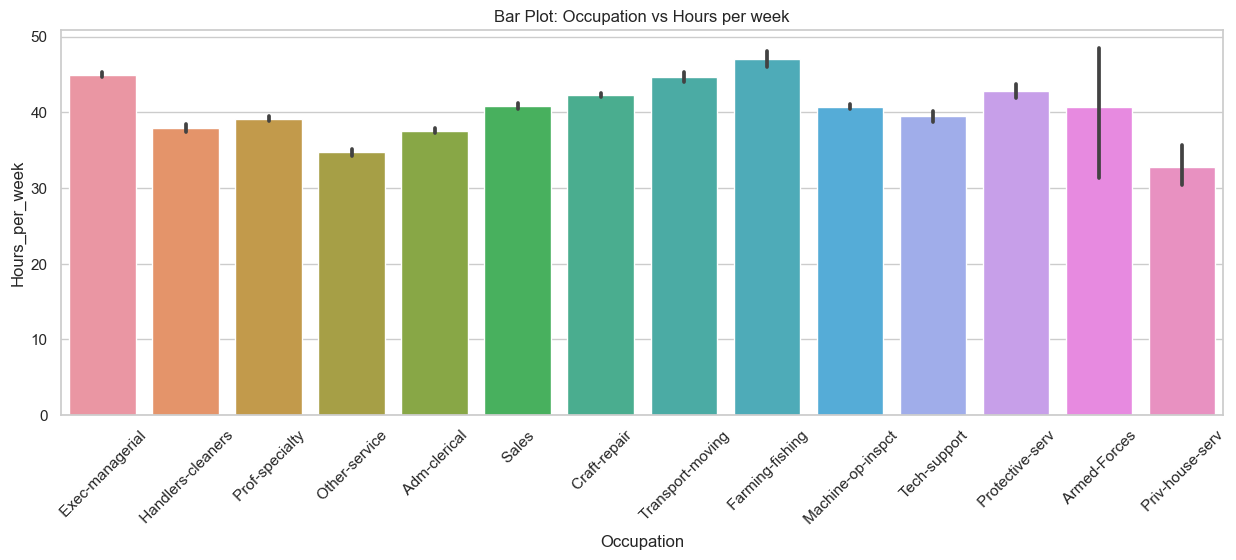

In [42]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Occupation', y = 'Hours_per_week', data = df)
plt.title("Bar Plot: Occupation vs Hours per week")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Occupation vs Hours_per_week
The bar plot for 'Occupation' vs 'Hours_per_Week' illustrates variations in the number of hours worked per week across different occupations. Notably, 'Prof-specialty' stands out, indicating a high average number of hours worked, which is often associated with demanding professional roles. 'Exec-managerial' also reports a substantial weekly working time, highlighting the commitment of individuals in leadership and executive positions. 'Sales' and 'Craft-repair' occupations follow with moderately high work hours. In contrast, 'Priv-house-serv', 'Armed-Forces', and 'Protective-serv' demonstrate notably lower hours worked, potentially reflecting the nature of these roles, such as domestic service or military service. Other occupations, like 'Tech-support', 'Machine-op-inspct', and 'Transport-moving', report intermediate working hours. This data provides insights into the diverse work hour patterns in different occupations.

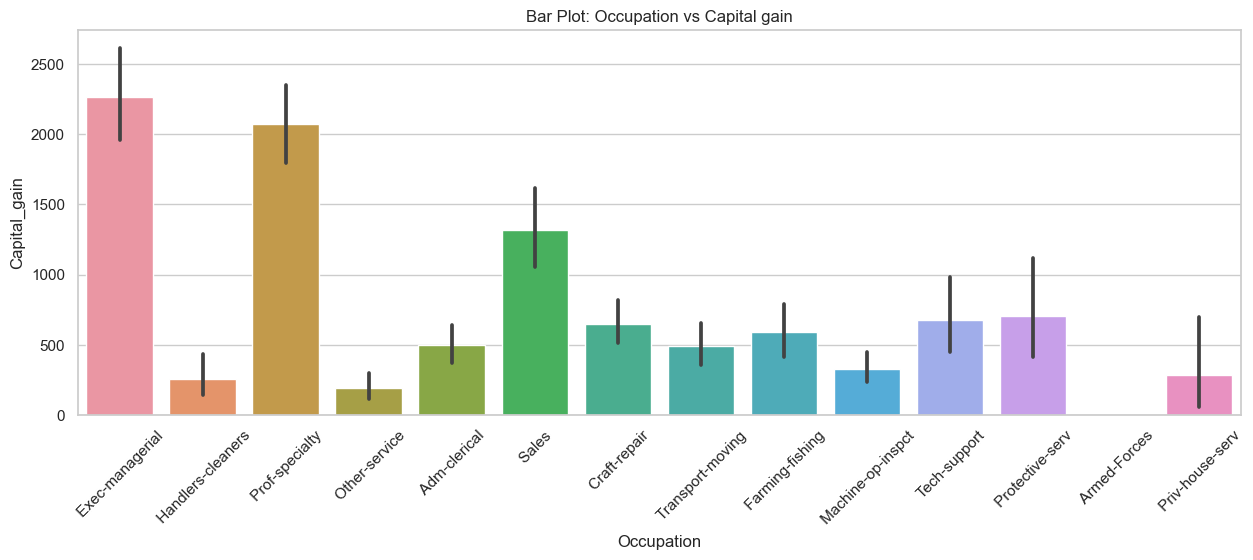

In [43]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Occupation', y = 'Capital_gain', data = df)
plt.title("Bar Plot: Occupation vs Capital gain")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Occupation vs Capital_gain
The bar plot for 'Occupation' vs. 'Capital Gain' uncovers distinct patterns in capital gains across various occupations. Notably, 'Prof-specialty' occupation reveals the highest average capital gains, indicating the financial success often associated with professional and specialized roles. 'Exec-managerial' positions also report significant capital gains, reflecting the financial rewards that come with leadership and management roles. In contrast, 'Priv-house-serv' and 'Armed-Forces' occupations have zero or minimal capital gains, suggesting limited financial growth in these roles. Other occupations, such as 'Craft-repair,' 'Sales,' and 'Transport-moving,' exhibit intermediate capital gains. This data provides valuable insights into the varying financial achievements within different occupational categories.

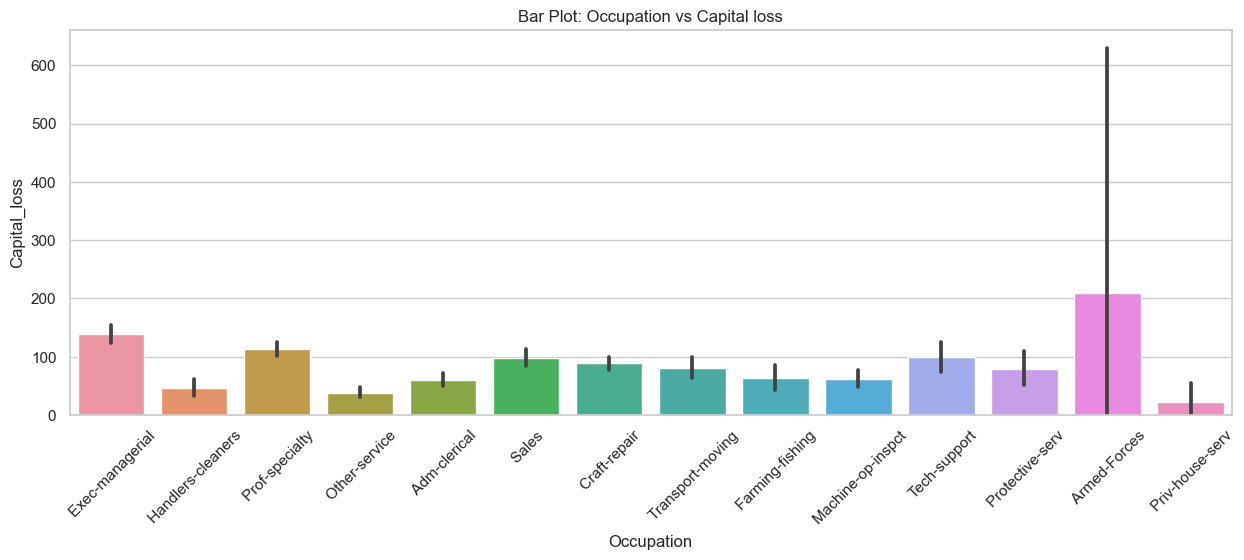

In [44]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Occupation', y = 'Capital_loss', data = df)
plt.title("Bar Plot: Occupation vs Capital loss")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Occupation vs Capital_loss
The bar plot for 'Occupation' vs. 'Capital Loss' highlights variations in capital losses among different occupations. 'Prof-specialty' occupations exhibit the highest average capital losses, potentially indicating the financial risks and investments associated with specialized professional roles. 'Exec-managerial' positions also report significant capital losses, reflecting financial complexities related to leadership and management roles. In contrast, 'Priv-house-serv' and 'Armed-Forces' occupations demonstrate minimal capital losses, likely due to the nature of these roles. Other occupations, such as 'Craft-repair,' 'Sales,' and 'Transport-moving,' show intermediate levels of capital losses. This data provides insights into the financial dynamics within various occupational categories.

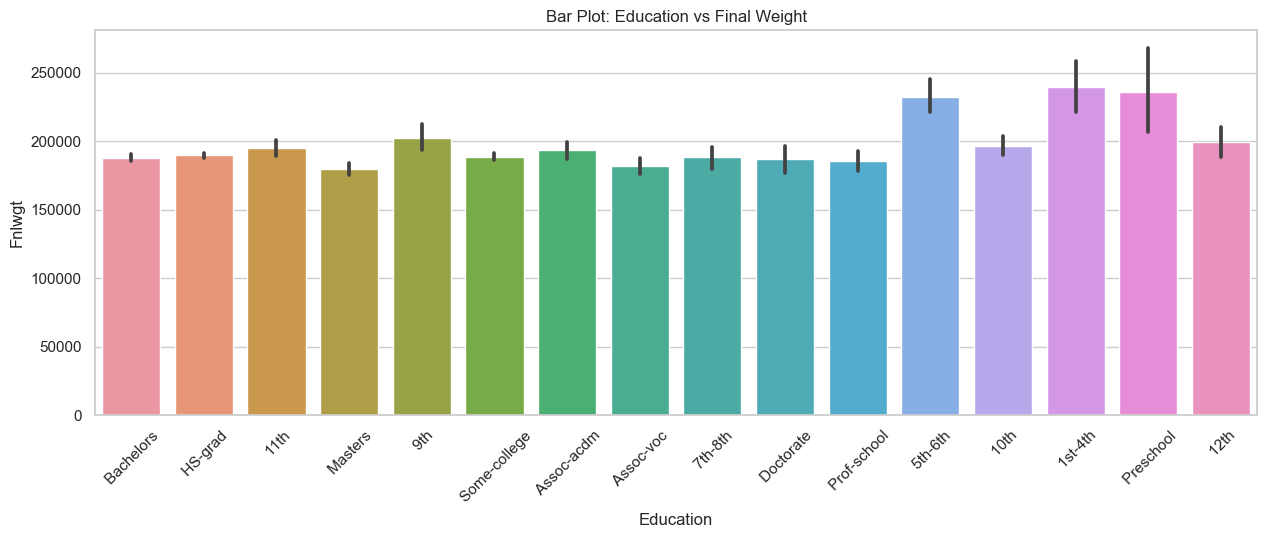

In [45]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Education', y = 'Fnlwgt', data = df)
plt.title("Bar Plot: Education vs Final Weight")
plt.xticks(rotation = 45)
plt.show() 

### Observations:
#### Education vs Fnlwgt
The bar plot for 'Education' vs 'Fnlwgt' illustrates the distribution of individuals across various education levels and their corresponding final weights. 'HS-grad' stands out as the most prominent category, indicating a significant number of individuals who have completed high school education. 'Some-college' follows closely, signifying those who pursued some level of college education. 'Bachelors' and 'Assoc-voc' levels also display notable final weights, representing individuals with bachelor's degrees and associate degrees in vocational fields. 'Masters' and 'Assoc-acdm' reflect individuals with postgraduate degrees and associate degrees in academic fields, respectively. On the other hand, 'Preschool' and 'Doctorate' exhibit considerably lower final weights, pointing to a smaller population of individuals at the early and advanced educational levels. This data offers insights into the distribution of educational attainment and its corresponding weight in the dataset.

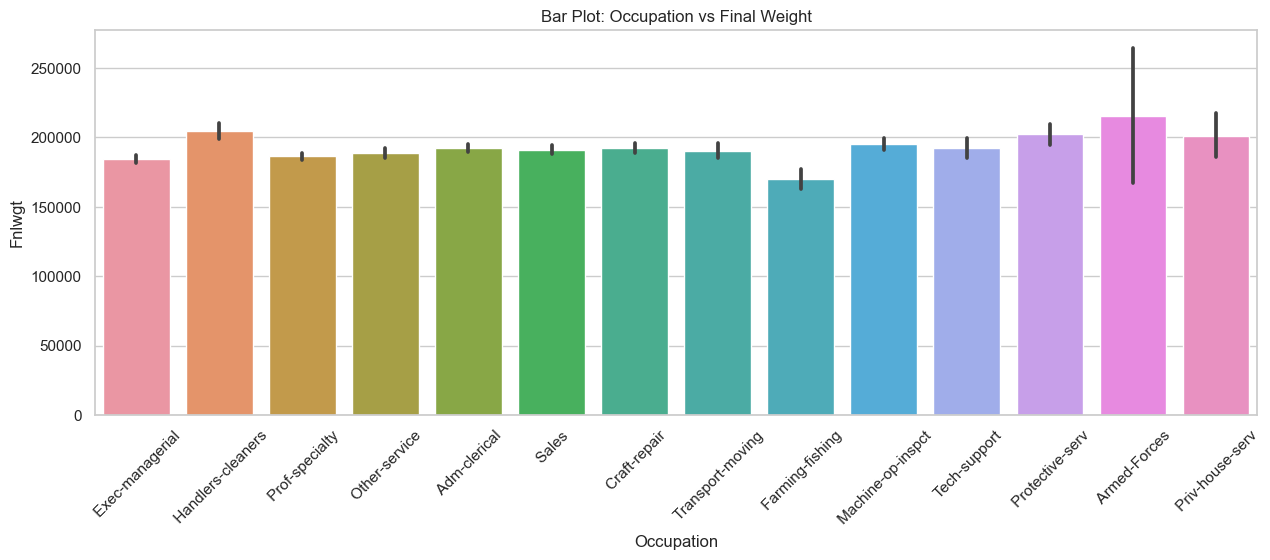

In [46]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Occupation', y = 'Fnlwgt', data = df)
plt.title("Bar Plot: Occupation vs Final Weight")
plt.xticks(rotation = 45)
plt.show()

### Observations:
#### Occupation vs Fnlwgt
The bar plot for 'Occupation' vs 'Fnlwgt' showcases the distribution of individuals across various occupations and their corresponding final weights. 'Exec-managerial' and 'Prof-specialty' occupations stand out with the highest final weights, signifying a significant number of individuals in leadership, management, and specialized professional roles. 'Craft-repair' and 'Sales' also report substantial final weights, highlighting the prevalence of workers in these fields. 'Other-service' and 'Machine-op-inspct' show intermediate final weights, representing a moderate presence of employees in these categories. Conversely, 'Priv-house-serv' and 'Armed-Forces' have notably lower final weights, indicating a smaller population engaged in domestic service and military service. This data offers valuable insights into the distribution of individuals across different occupational categories based on their final weights.

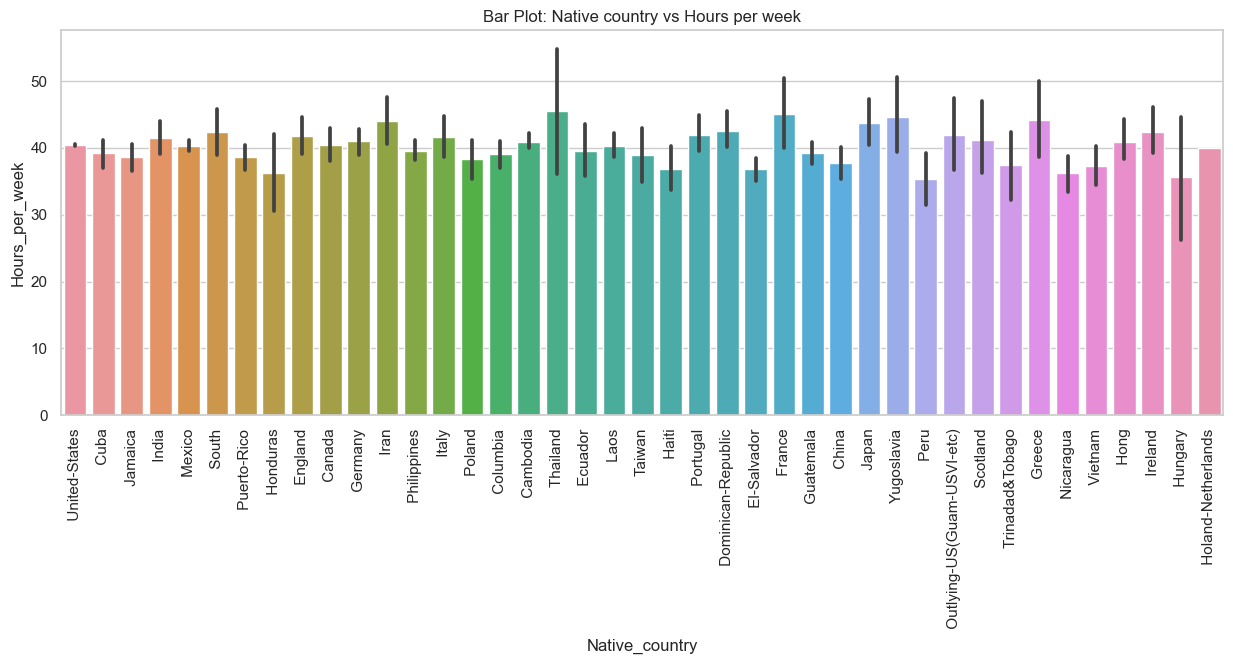

In [47]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Native_country', y = 'Hours_per_week', data = df)
plt.title("Bar Plot: Native country vs Hours per week")
plt.xticks(rotation = 90)
plt.show()

### Observations:
#### Native_country vs Hours_per_week
The bar plot for 'Native_country' vs 'Hours_per_week' provides insights into the variations in weekly work hours among individuals from different countries. 'United-States' shows the highest average weekly work hours, reflecting the diverse workforce within the country. 'Mexico' follows with a substantial number of hours worked per week, indicating a dedicated labor force. 'Canada,' 'Germany,' and 'Philippines' also demonstrate moderately high work hours, suggesting an industrious work culture in these countries. Conversely, 'Holand-Netherlands' has the lowest work hours, representing a smaller population of individuals with shorter work weeks. This data illustrates the diversity in work hour patterns across various native countries.

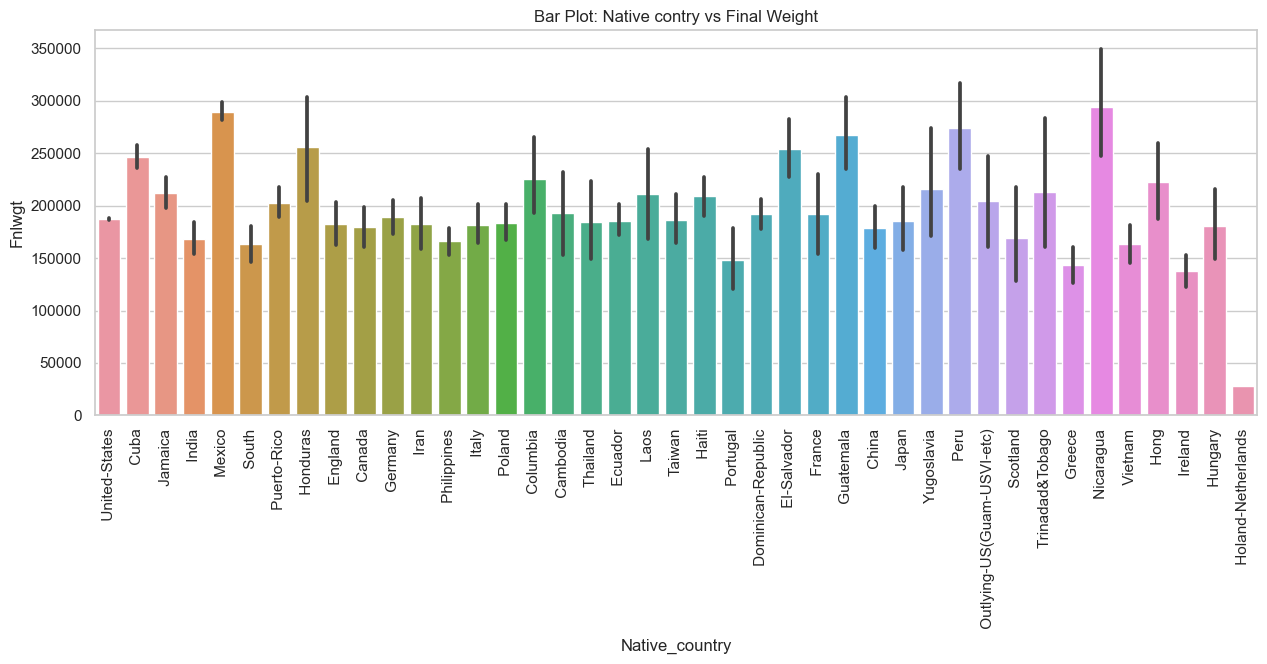

In [48]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Native_country', y = 'Fnlwgt', data = df)
plt.title("Bar Plot: Native contry vs Final Weight")
plt.xticks(rotation = 90)
plt.show()

### Observations:
#### Native_country vs Fnlwgt
The bar plot for 'Native_country' vs 'Fnlwgt' reveals the distribution of individuals across various native countries and their corresponding final weights. 'United-States' showcases the highest final weight, reflecting a significant population of individuals within the country. 'Mexico' follows with a substantial final weight, indicating a considerable number of individuals from Mexico in the dataset. 'Canada', 'Germany', and 'Philippines' also report notable final weights, reflecting their representation within the dataset. In contrast, 'Holand-Netherlands' has the lowest final weight, indicating a relatively smaller representation in the dataset. This data provides insights into the distribution of individuals across different native countries based on their final weights.

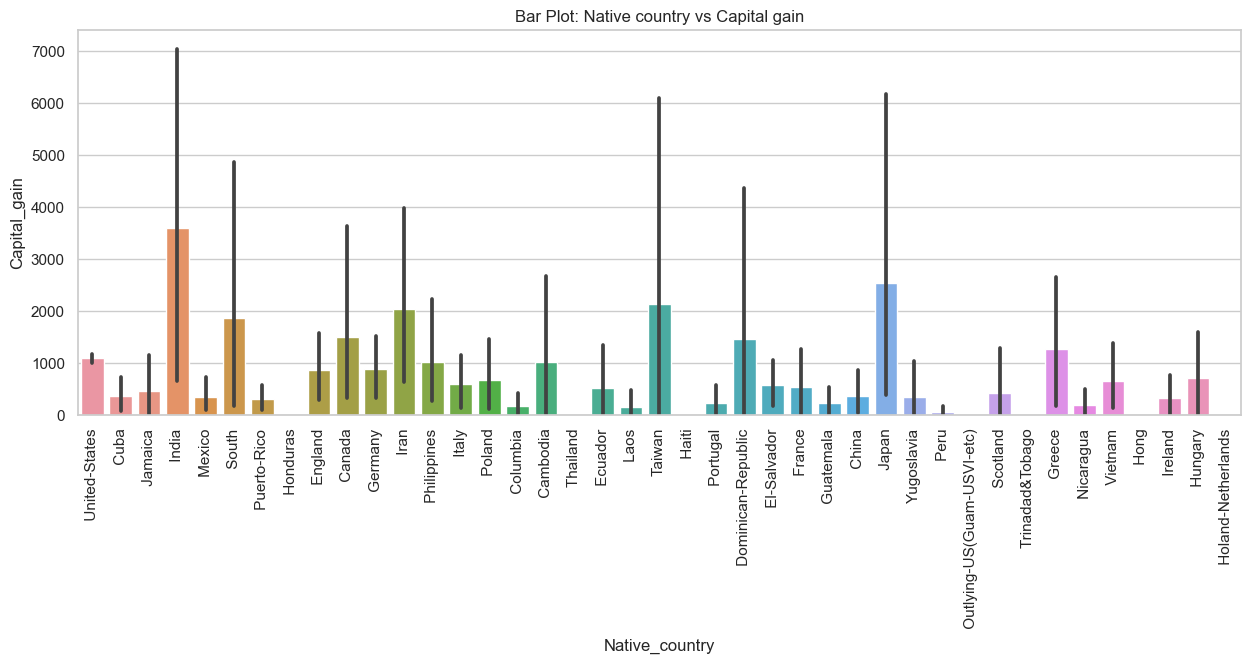

In [49]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Native_country', y = 'Capital_gain', data = df)
plt.title("Bar Plot: Native country vs Capital gain")
plt.xticks(rotation = 90)
plt.show()

### Observations:
#### Native_country vs Capital_gain
The bar plot for 'Native_country' vs 'Capital_gain' reveals the distribution of capital gains among individuals from different native countries. 'United-States' exhibits the highest total capital gains, reflecting the presence of a significant number of individuals and their respective financial success. 'India' follows with considerable capital gains, possibly indicating a financially prosperous group of individuals. 'Japan' and 'South' also report substantial capital gains, suggesting financial achievement within these populations. In contrast, several countries, such as 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong' 'Thailand', and 'Trinadad & Tobago', have no reported capital gains, indicating financial inactivity or minimal investment income in these native countries. This data provides insights into the distribution of capital gains across various native countries.

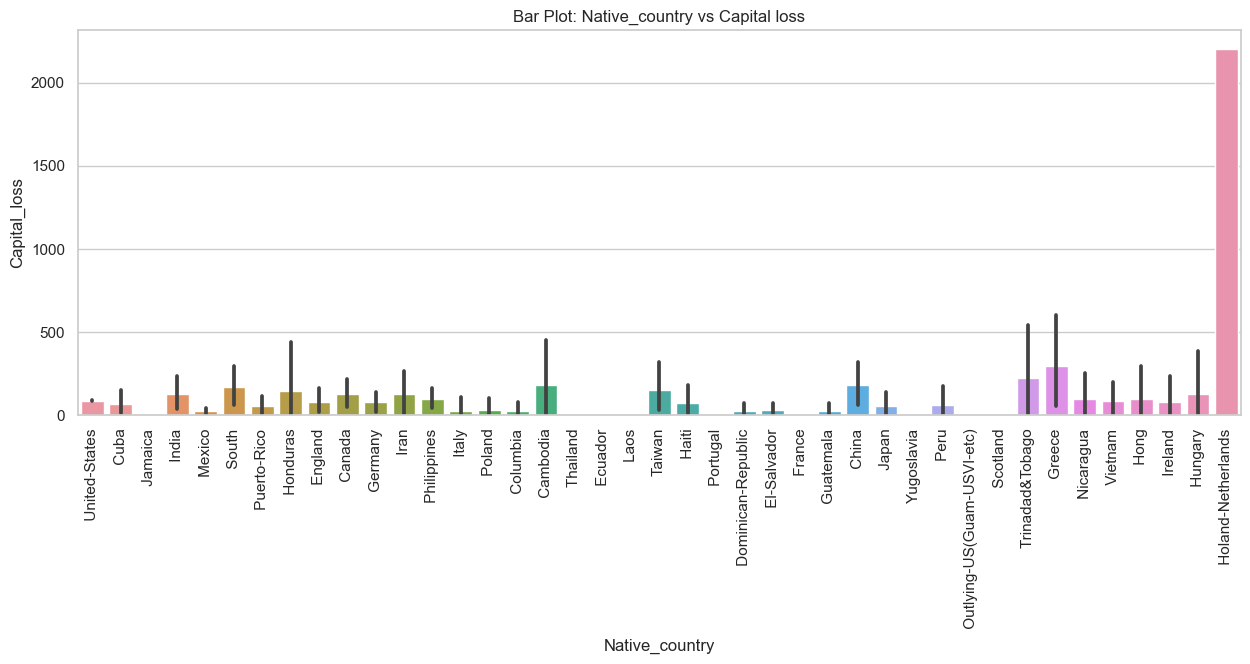

In [50]:
# Bivariate analysis using bar plot
plt.figure(figsize = (15, 5))
sns.barplot(x = 'Native_country', y = 'Capital_loss', data = df)
plt.title("Bar Plot: Native_country vs Capital loss")
plt.xticks(rotation = 90)
plt.show()

### Observations:
#### Native_country vs Capital_loss
The bar plot for 'Native_country' vs 'Capital_loss' illustrates the distribution of capital losses among individuals from various native countries. 'United-States' displays the highest total capital losses, reflecting the presence of a significant number of individuals and their respective financial dynamics. 'India' follows with substantial capital losses, suggesting financial complexities or investment challenges within this group. In contrast, several countries, such as 'Ecuador', 'France,' 'Laos', 'Portugal', 'Scotland', and 'Thailand', report no capital losses, indicating either financial stability or a lack of investment losses in these native countries. This data provides valuable insights into the distribution of capital losses across different native countries.

### Pair Plot

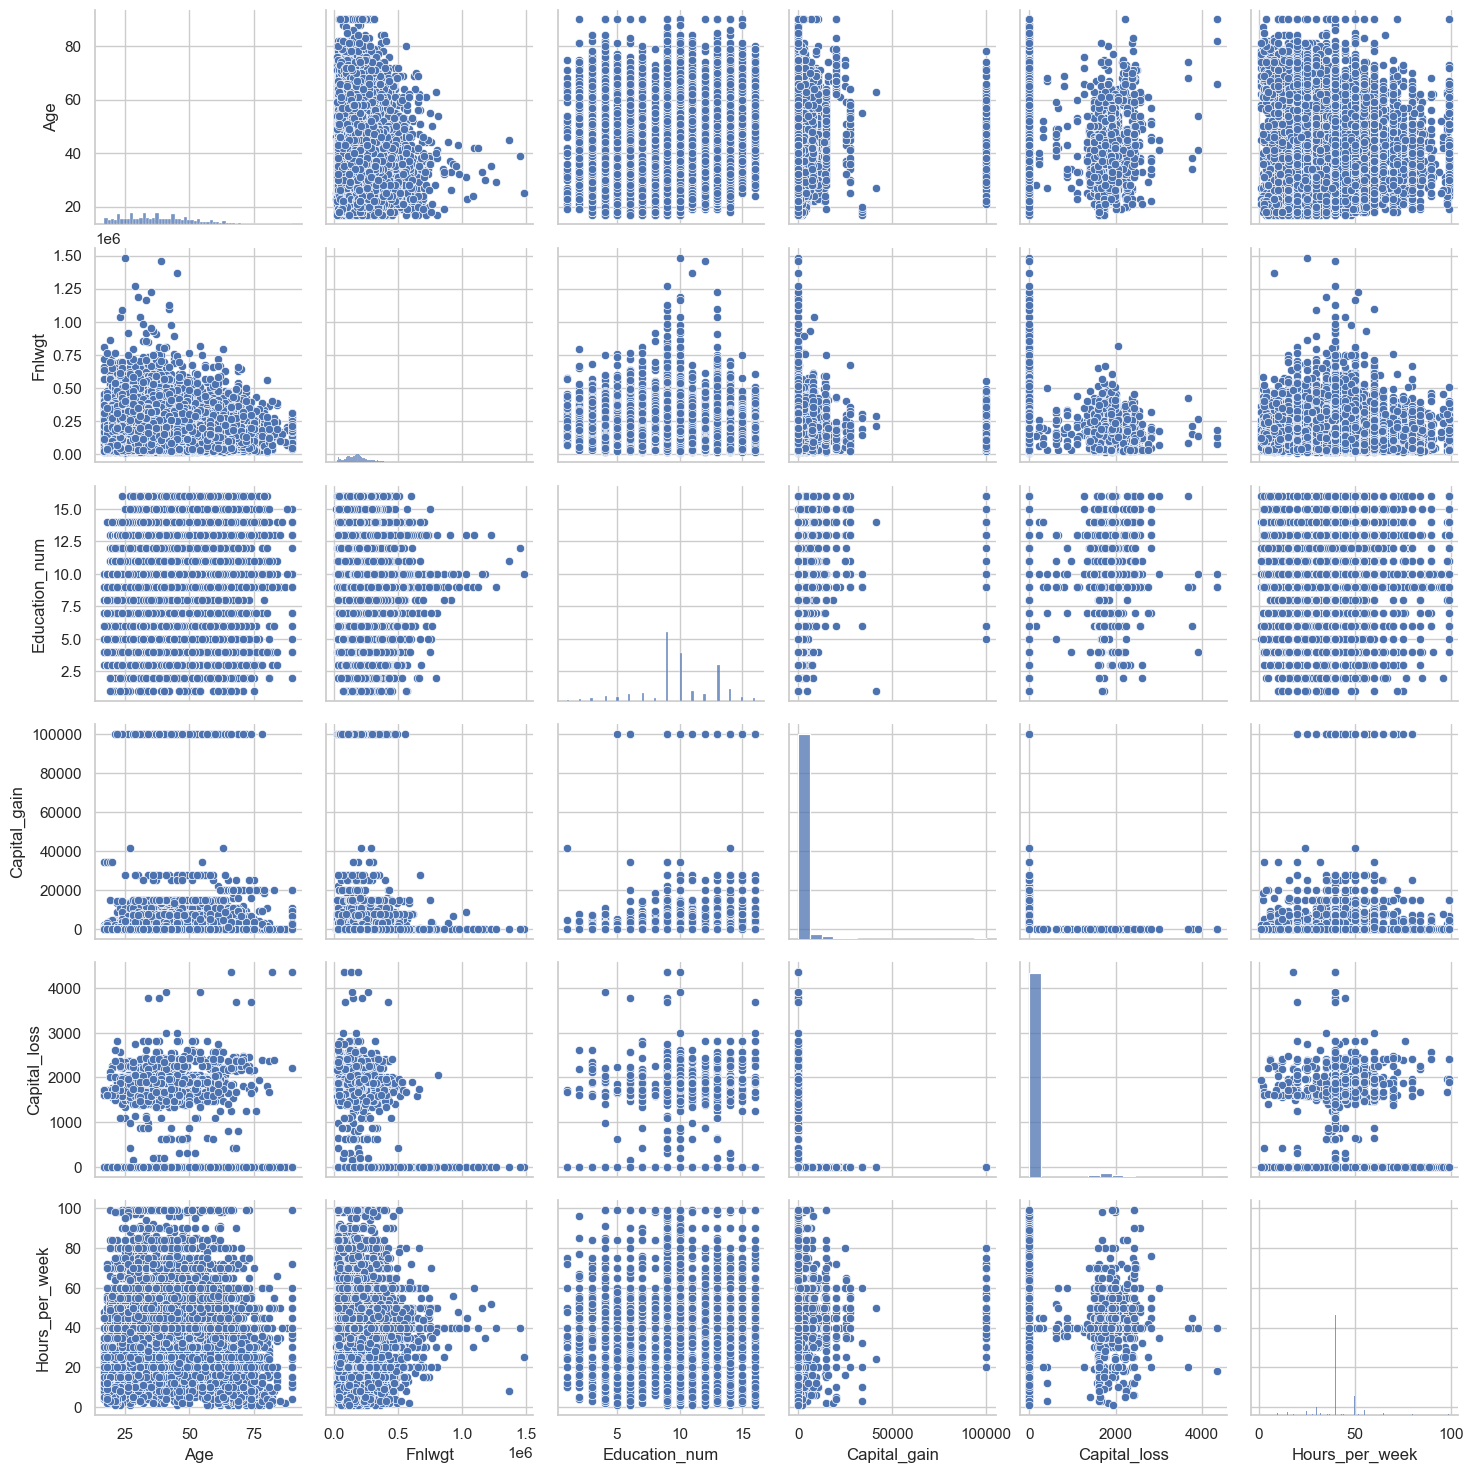

In [51]:
# Bivariate analysis using pairplot
columns_to_plot = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

sns.pairplot(df[columns_to_plot])
plt.show()

### Observations:
The pair plot suggests several interesting relationships among the attributes. First, there is a strong positive relationship between age and education level. Age also demonstrates a good relationship with capital gains, suggesting that older individuals may have slightly higher capital gains, although the effect is minimal. Education level (Education_num) and hours worked per week (Hours_per_week) reveal a good relationship. This means that individuals with higher education tend to work longer hours. Capital gains and hours worked per week lso have a good relationship, implying that those who work longer hours may have slightly higher capital gains. On the other hand, final weight (Fnlwgt) and capital loss show a weak relationship, suggesting that as the final weight decreases, capital losses may slightly increase. Additionally, there is a weak relationship between capital loss and hours worked per week, indicating that increased work hours may have a limited impact on capital losses.

### Line Plot

Text(0.5, 1.0, 'Line Plot: Age vs Income')

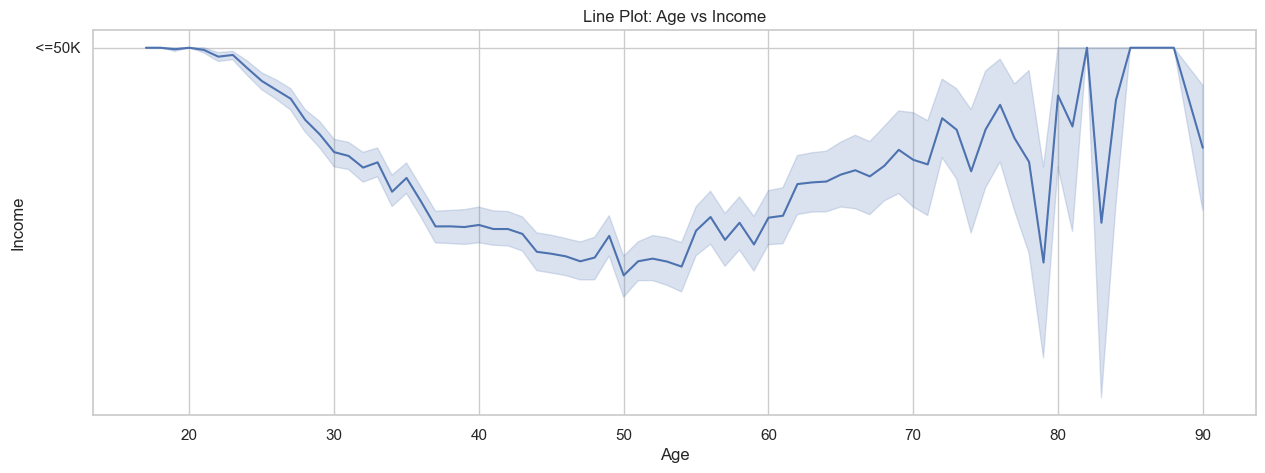

In [52]:
# Bivariate analysis using line plot
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = 'Age', y = 'Income')
plt.title("Line Plot: Age vs Income")

### Observations:
#### Age vs Income
The line plot for 'Age' vs 'Income' reveals that younger individuals tend to have lower income levels, while older individuals are more likely to have higher incomes.

Text(0.5, 1.0, 'Line Plot: Hours per week vs Income')

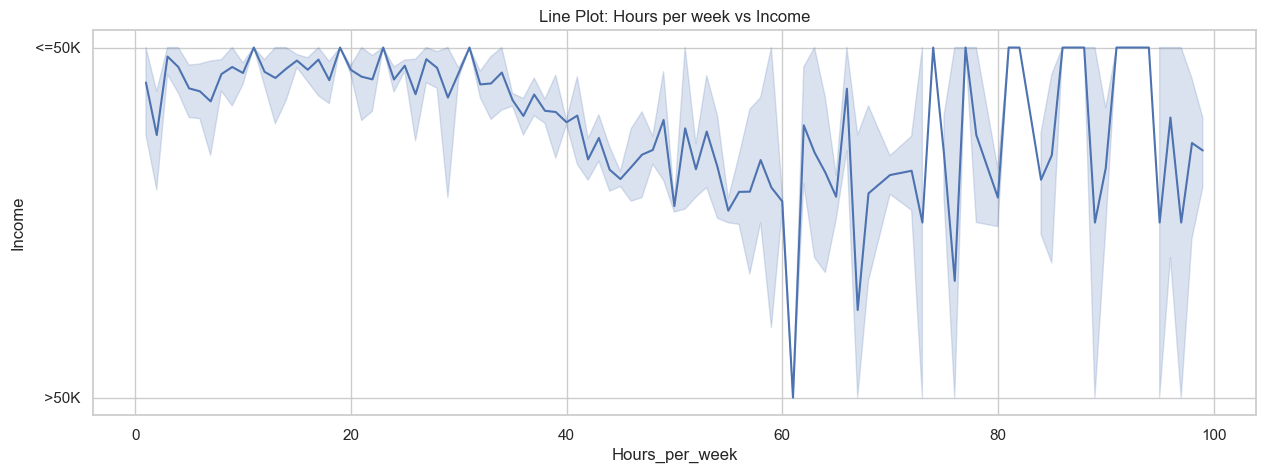

In [53]:
# Bivariate analysis using line plot
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = 'Hours_per_week', y = 'Income')
plt.title("Line Plot: Hours per week vs Income")

### Observations:
#### Hours_per_week vs Income
The line plot for 'Hours_per_week' vs 'Income' shows that individuals working fewer hours tend to have lower incomes, while those working longer hours are more likely to have higher incomes.

## Multivariate Analysis

### Scatter Plot

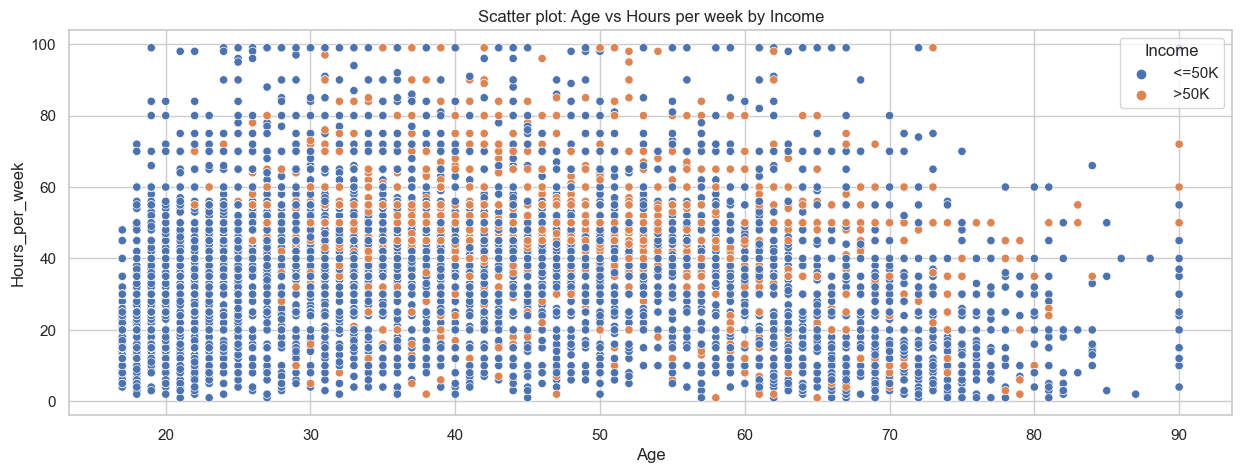

In [54]:
# Multivariate analysis using scatter plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'Age', y = 'Hours_per_week', hue = 'Income', data = df)
plt.title("Scatter plot: Age vs Hours per week by Income")
plt.show()

### Observations:
#### Age vs Hours_per_week by Income
The scatter plot for 'Age' vs 'Hours_per_week,' categorized by 'Income' shows that younger individuals are spread across varying weekly working hours, with some earning '<=50K' and others achieving '>50K'. In contrast, older individuals tend to work longer hours and are more likely to earn incomes exceeding '>50K'.

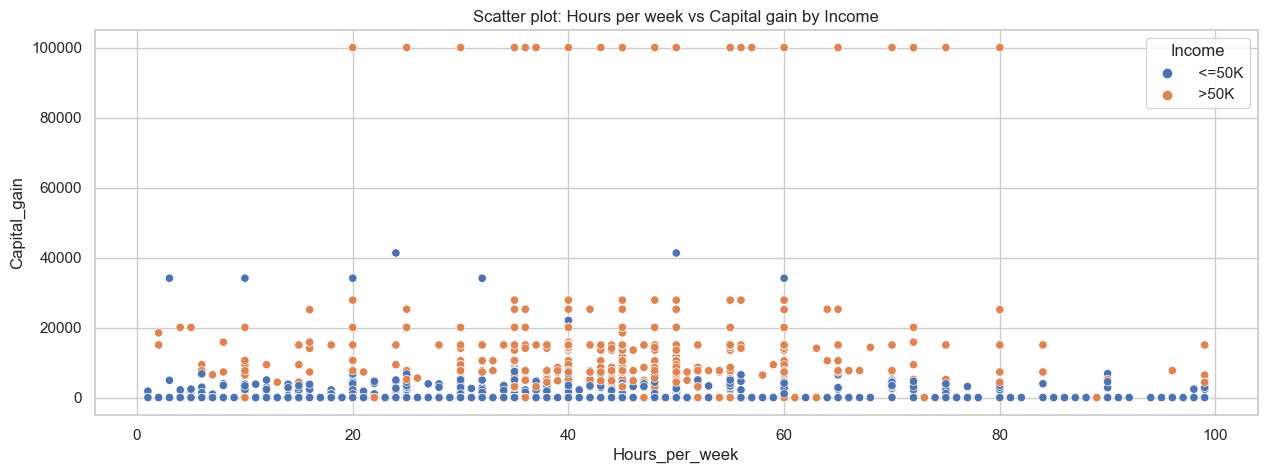

In [55]:
# Multivariate analysis using scatter plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'Hours_per_week', y = 'Capital_gain', hue = 'Income', data = df)
plt.title("Scatter plot: Hours per week vs Capital gain by Income")
plt.show()

### Observations:
#### Hours_per_week vs Capital_gain by Income
The scatter plot for 'Hours_per_week' vs 'Capital_gain,' categorized by 'Income', reveals trends such as individuals working longer hours having a broader range of capital gains, while those working fewer hours typically have more limited capital gains and are more likely to earn '<=50K'.

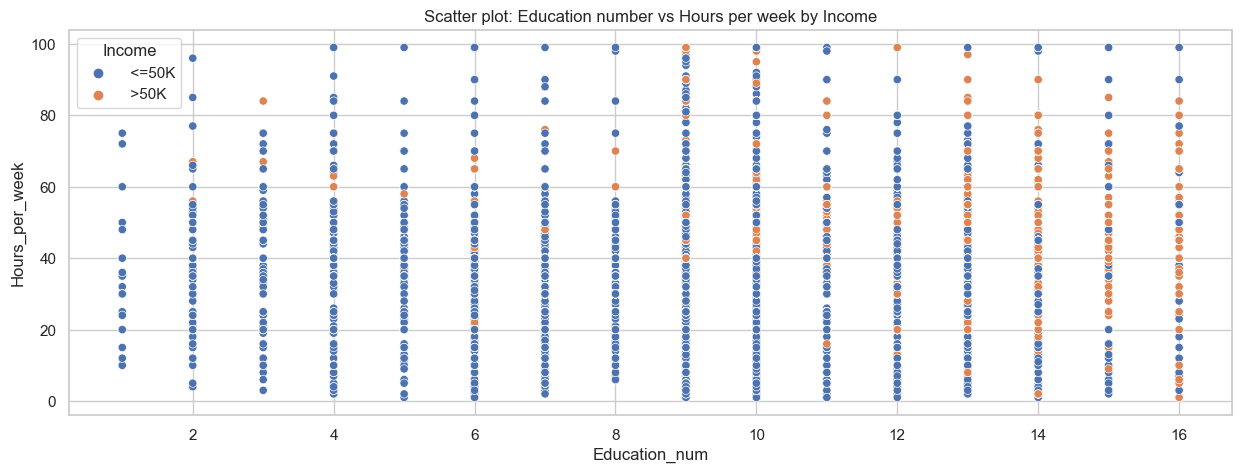

In [56]:
# Multivariate analysis using scatter plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'Education_num', y = 'Hours_per_week', hue = 'Income', data = df)
plt.title("Scatter plot: Education number vs Hours per week by Income")
plt.show()

### Observations:
#### Education_num vs Hours_per_week by Income
The scatter plot for 'Education_num' vs 'Hours_per_week,' categorized by 'Income', reveals that individuals with higher education levels have varied working hours and may fall into both income categories. Those with lower education levels tend to work longer hours and are more likely to have incomes '<=50K'.

# Label Encoding

Converting the categorical columns into numerical columns.

In [57]:
# list of columns to encode
columns_to_encode = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country',
                     'Income']

encoder = LabelEncoder()
for i in columns_to_encode:
    df[i] = encoder.fit_transform(df[i])

In [58]:
# Display the dataset after ;abel encoding
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

#### Target variable 'Income' has been encoded as follows: 0 for '<=50K (lower income)'  and 1 for '>50K (higher income)'.


## Checking for the outliers

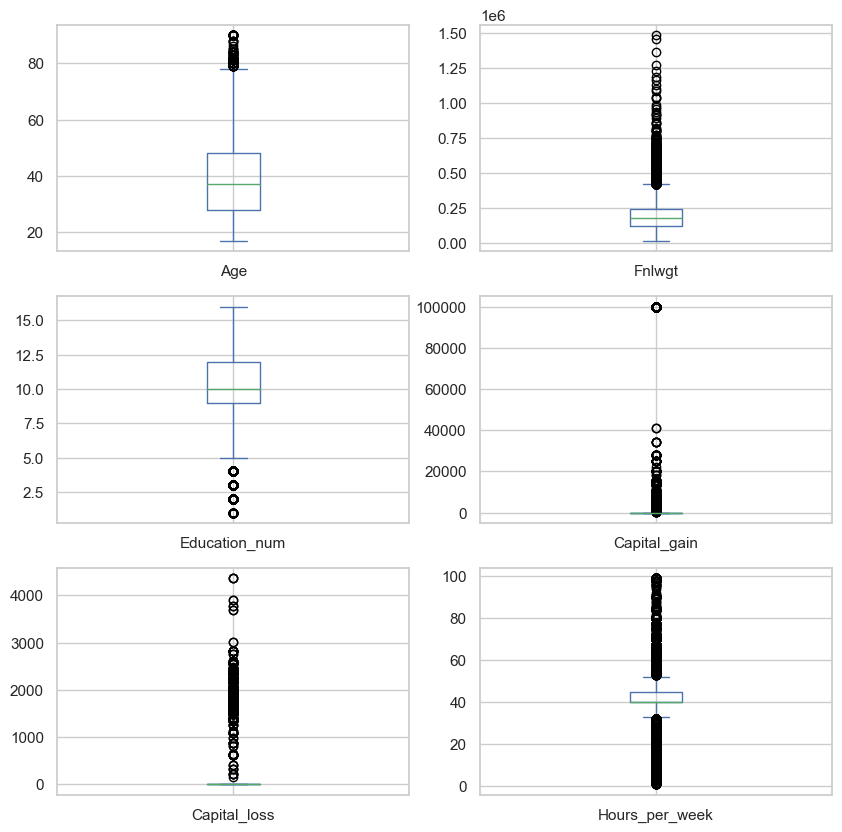

In [59]:
# Checking for the outliers using boxplot in numerical columns
# Numerical columns include 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', and 'Loan_Amount_Term'columns
numerical_columns = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
df[numerical_columns].plot(kind = 'box', subplots = True, figsize = (10, 10), layout = (3, 2))
plt.show()

Outliers are present in 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', and 'Hours_per_week' columns.

In [60]:
# List of columns containing outliers
columns_with_outliers = ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'] 

In [61]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df[columns_with_outliers]))
z_score

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
0      0.836961  1.008703       1.134817      0.145969      0.216747   
1      0.042934  0.245008       0.420646      0.145969      0.216747   
2      1.056935  0.425720       1.198377      0.145969      0.216747   
3      0.776180  1.408036       1.134817      0.145969      0.216747   
4      0.116259  0.898091       1.523683      0.145969      0.216747   
...         ...       ...            ...           ...           ...   
32555  0.849505  0.639647       0.745951      0.145969      0.216747   
32556  0.103715  0.335469       0.420646      0.145969      0.216747   
32557  1.423558  0.358812       0.420646      0.145969      0.216747   
32558  1.216128  0.110897       0.420646      0.145969      0.216747   
32559  0.983611  0.929781       0.420646      1.887612      0.216747   

       Hours_per_week  
0            2.222450  
1            0.035664  
2            0.035664  
3            0.035664  
4            0.035664  
...               ...  
32555        0.197648  
32556        0.035664  
32557        0.035664  
32558        1.655506  
32559        0.035664  

[32536 rows x 6 columns]

In [62]:
# Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [63]:
# Removing Outliers
z = 3
updated_df = df[(z_score < z).all(axis = 1)]
updated_df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          5   83311          9             13               2   
1       38          3  215646         11              9               0   
2       53          3  234721          1              7               2   
3       28          3  338409          9             13               2   
4       37          3  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          3  257302          7             12               2   
32556   40          3  154374         11              9               2   
32557   58          3  151910         11              9               6   
32558   22          3  201490         11              9               4   
32559   52          4  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[29808 rows x 15 columns]

In [64]:
# Checking the shape of dataframe after removing the outliers
updated_df.shape

(29808, 15)

## Checking for the skewness

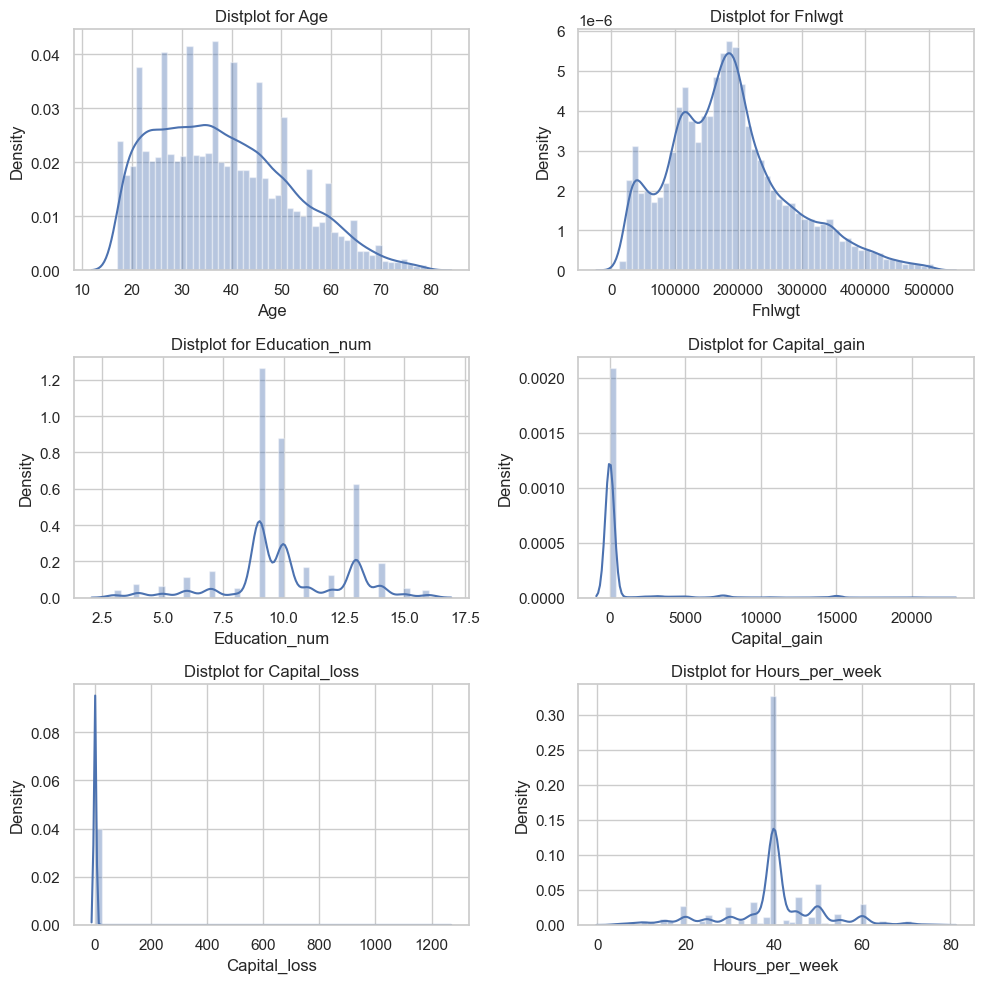

In [65]:
# Checking for the skewness using dist plot in numerical columns
# Numerical columns include 'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', and 'Hours_per_week' columns.
ncol = 2
nrow = 3
plt.figure(figsize = (10, 10))

for i in range(0, len(numerical_columns)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(updated_df[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

### Observations:
Age: 'Age' appears to have a moderately right-skewed distribution.

Fnlwgt: 'Fnlwgt' exhibits a substantially right-skewed distribution.

Education_num: 'Education_num' suggests a moderately right-skewed distribution.

Capital_gain: 'Capital_gain' shows a substantially right-skewed distribution.

Capital_loss: 'Capital_loss' appears to have a substantially right-skewed distribution.

Hours_per_week: 'Hours_per_week' exhibits a moderately left-skewed distribution.

In [66]:
# Checking for the skewness using skew() method
updated_df[numerical_columns].skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

Based on skewness scores, 'Capital_gain' and 'Capital_loss' have high and very high positive skewness, respectively. 

In [67]:
# List of the columns to be transformed
columns_to_transform = ['Capital_gain', 'Capital_loss']

# Copying data
updated_df2 = updated_df.copy()

# Reduing skewnees using yeojohnson transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df[column] + 1)
    updated_df2[column] = transformed_data

In [68]:
# Again checking for the skewness after applying transformation
updated_df2[columns_to_transform].skew()

Capital_gain    3.072803
Capital_loss    0.000000
dtype: float64

Skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [69]:
updated_df2.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1      0.423791      0.022033   
1           5             1     4    1      0.423791      0.022033   
2           5             0     2    1      0.423791      0.022033   
3           9             5     2    0      0.423791      0.022033   
4           3             5     4    0      0.423791      0.022033   

   Hours_per_week  Native_country  Income  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

# Correlation Coefficient Matrix

In [70]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df2.corr()
correlation_coefficient

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.032951 -0.074430  -0.007864       0.041431   
Workclass       0.032951   1.000000 -0.022991   0.003432      -0.000674   
Fnlwgt         -0.074430  -0.022991  1.000000  -0.021322      -0.037725   
Education      -0.007864   0.003432 -0.021322   1.000000       0.349672   
Education_num   0.041431  -0.000674 -0.037725   0.349672       1.000000   
Marital_status -0.285335  -0.016093  0.029000  -0.035075      -0.059092   
Occupation     -0.002594   0.008216 -0.002200  -0.041907       0.069639   
Relationship   -0.266802  -0.057609  0.008349  -0.010888      -0.096694   
Race            0.027937   0.045442 -0.010514   0.015261       0.028587   
Sex             0.086589   0.068831  0.028520  -0.029446       0.009276   
Capital_gain    0.121386   0.003633 -0.005712   0.016599       0.105267   
Capital_loss    0.019744  -0.010198  0.000517  -0.001575       0.008890   
Hours_per_week  0.091817   0.027270 -0.015489   0.056459       0.150713   
Native_country -0.002044  -0.001547 -0.059889   0.066596       0.057462   
Income          0.239314  -0.007180 -0.009160   0.071699       0.318731   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.285335   -0.002594     -0.266802  0.027937  0.086589   
Workclass            -0.016093    0.008216     -0.057609  0.045442  0.068831   
Fnlwgt                0.029000   -0.002200      0.008349 -0.010514  0.028520   
Education            -0.035075   -0.041907     -0.010888  0.015261 -0.029446   
Education_num        -0.059092    0.069639     -0.096694  0.028587  0.009276   
Marital_status        1.000000    0.035351      0.184713 -0.066169 -0.123350   
Occupation            0.035351    1.000000     -0.036558 -0.003263  0.049930   
Relationship          0.184713   -0.036558      1.000000 -0.116226 -0.577197   
Race                 -0.066169   -0.003263     -0.116226  1.000000  0.089914   
Sex                  -0.123350    0.049930     -0.577197  0.089914  1.000000   
Capital_gain         -0.063945    0.006338     -0.081247  0.024404  0.064222   
Capital_loss         -0.017065   -0.000648      0.036201 -0.001020 -0.033186   
Hours_per_week       -0.195162   -0.022743     -0.257798  0.045400  0.233755   
Native_country       -0.016462   -0.001894     -0.011196  0.115445  0.002548   
Income               -0.194355    0.030533     -0.245913  0.071755  0.209946   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.121386      0.019744        0.091817       -0.002044   
Workclass           0.003633     -0.010198        0.027270       -0.001547   
Fnlwgt             -0.005712      0.000517       -0.015489       -0.059889   
Education           0.016599     -0.001575        0.056459        0.066596   
Education_num       0.105267      0.008890        0.150713        0.057462   
Marital_status     -0.063945     -0.017065       -0.195162       -0.016462   
Occupation          0.006338     -0.000648       -0.022743       -0.001894   
Relationship       -0.081247      0.036201       -0.257798       -0.011196   
Race                0.024404     -0.001020        0.045400        0.115445   
Sex                 0.064222     -0.033186        0.233755        0.002548   
Capital_gain        1.000000     -0.011830        0.073096        0.010138   
Capital_loss       -0.011830      1.000000       -0.003241        0.001281   
Hours_per_week      0.073096     -0.003241        1.000000        0.006760   
Native_country      0.010138      0.001281        0.006760        1.000000   
Income              0.261880     -0.017431        0.230589        0.016525   

                  Income  
Age             0.239314  
Workclass      -0.007180  
Fnlwgt         -0.009160  
Education       0.071699  
Education_num   0.318731  
Marital_status -0.194355  
Occupation      0.030533  
Relationship   -0.245913  
Race            0.071755  
Sex             0.20

Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

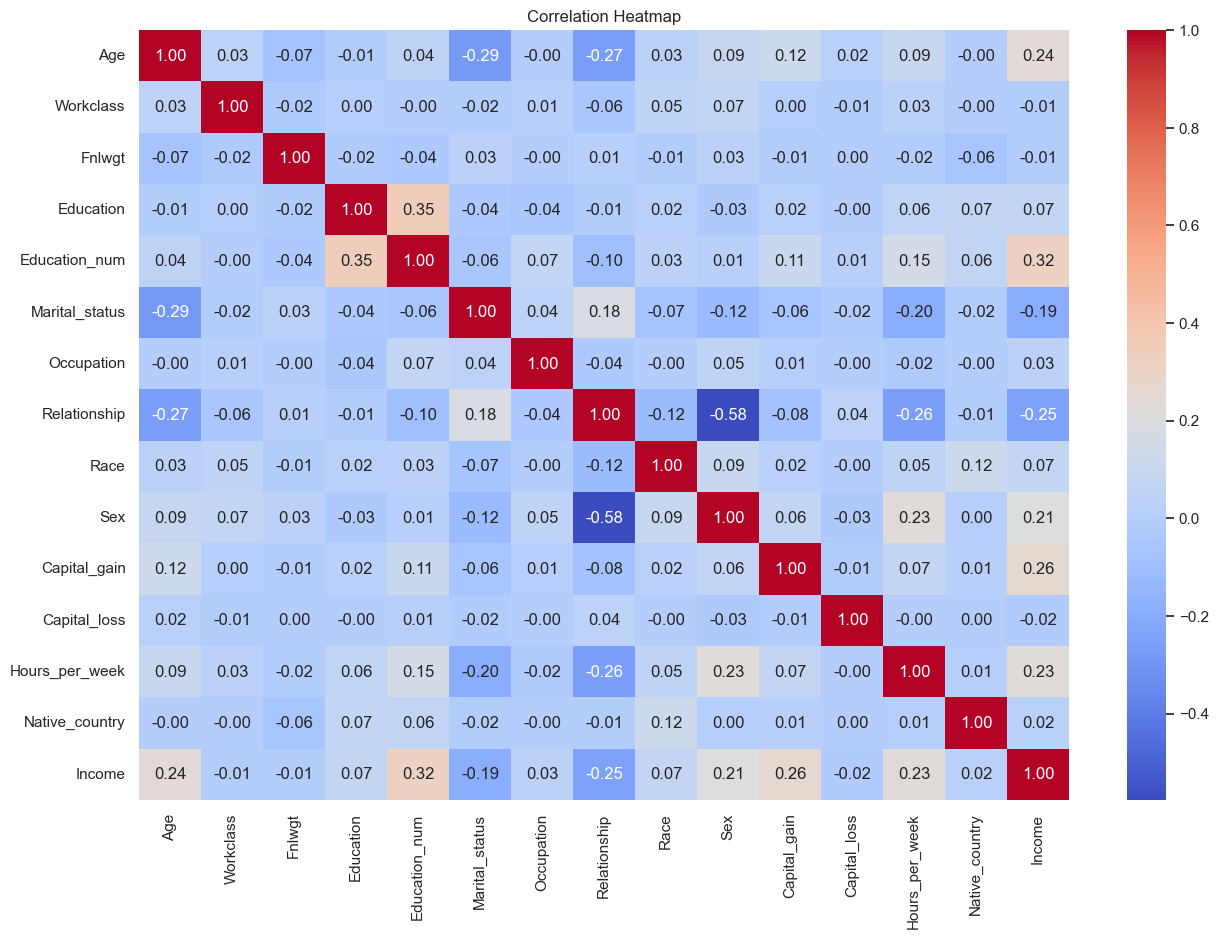

In [71]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:
Age: Strong positive correlation with 'Hours_per_week'. Weak to moderate correlations with other columns.

Workclass: Weak correlations with most columns, including 'Education_num', 'Marital_status', 'Relationship', and others.

Fnlwgt: Weak correlations with most columns, including 'Age', 'Education', 'Capital_gain', and others.

Education: Weak to moderate correlations with most columns, including 'Education_num', 'Marital_status', 'Relationship', and others.

Education_num: Strong positive correlation with 'Hours_per_week'. Weak to moderate correlations with other columns.

Marital_status: Weak correlations with most columns, including 'Age', 'Education', 'Capital_gain', and others.

Occupation: Weak correlations with most columns, including 'Marital_status', 'Relationship', 'Capital_gain', and others.

Relationship: Strong negative correlation with 'Sex'. Weak to moderate correlations with other columns.

Race: Weak correlations with most columns, including 'Sex', 'Capital_gain', 'Hours_per_week', and others.

Sex: Strong negative correlation with 'Relationship'. Weak to moderate correlations with other columns.

Capital_gain: Strong positive correlation with 'Education_num'. Weak to moderate correlations with other columns.

Capital_loss: Weak correlations with most columns, including 'Fnlwgt', 'Occupation', 'Native_country', and others.

Hours_per_week: Strong positive correlation with 'Age'. Weak to moderate correlations with other columns.

Native_country: Weak correlations with most columns, including 'Education', 'Marital_status', 'Capital_loss', and others.

Income: Strong positive correlation with 'Education_num'. Weak to moderate correlations with other columns.

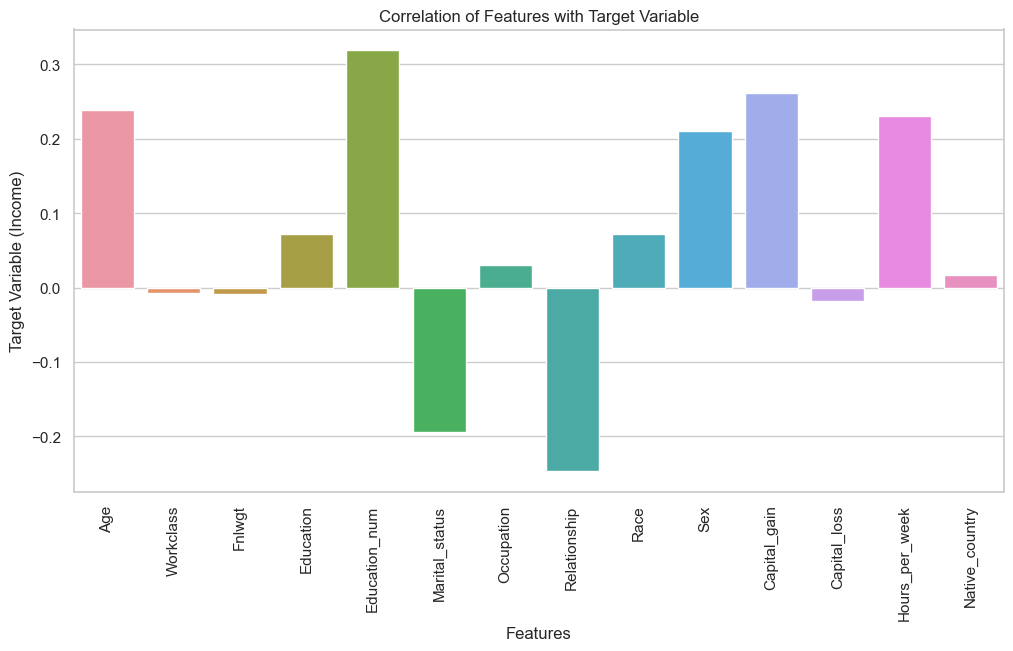

In [72]:
# Checking for the correlation between features and target variable separately
target = 'Income'

correlation_matrix = updated_df2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (Income)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:
Age: The 'Age' variable has a weak positive correlation of 0.239314 with 'Income', indicating that age has a slight positive influence on income.

Workclass: 'Workclass' shows a weak negative correlation of -0.007180 with 'Income', suggesting that the type of workclass may have a minor negative impact on income.

Fnlwgt: 'Fnlwgt' has a very weak negative correlation of -0.009160 with 'Income', implying that the final weight of individuals may have a minor negative impact on income.

Education: The 'Education' variable has a weak positive correlation of 0.071699 with 'Income', indicating that higher education levels may have a slight positive influence on income.

Education_num: 'Education_num' shows a moderate positive correlation of 0.318731 with 'Income', suggesting that the numeric representation of education has a moderate positive impact on income.

Marital_status: 'Marital_status' has a weak negative correlation of -0.194355 with 'Income', indicating that marital status may have a slight negative influence on income.

Occupation: The 'Occupation' variable has a weak positive correlation of 0.030533 with 'Income', implying that the type of occupation may have a slight positive influence on income.

Relationship: 'Relationship' shows a moderate negative correlation of -0.245913 with 'Income', suggesting that the type of relationship may have a moderate negative impact on income.

Race: 'Race' has a weak positive correlation of 0.071755 with 'Income', indicating that race may have a slight positive influence on income.

Sex: The 'Sex' variable has a weak positive correlation of 0.209946 with 'Income', implying that gender may have a slight positive influence on income.

Capital_gain: 'Capital_gain' shows a moderate positive correlation of 0.261880 with 'Income', suggesting that capital gains have a moderate positive impact on income.

Capital_loss: 'Capital_loss' has a very weak negative correlation of -0.017431 with 'Income', implying that capital losses may have a very minor negative impact on income.

Hours_per_week: The 'Hours_per_week' variable has a moderate positive correlation of 0.230589 with 'Income', indicating that the number of hours worked per week has a moderate positive influence on income.

Native_country: 'Native_country' shows a very weak positive correlation of 0.016525 with 'Income', suggesting that the native country of individuals may have a very minor positive impact on income.

# Feature Engineering

In [73]:
# Extracting features and target from the dataset
features = updated_df2.drop(columns = 'Income')
target = updated_df2['Income']

## Feature Scaling

In [74]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [75]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0  0.887304   1.732583 -1.077578  -0.340099       1.191227       -0.410260   
1 -0.011046  -0.078182  0.321940   0.176444      -0.439623       -1.730676   
2  1.111891  -0.078182  0.523669  -2.406268      -1.255048       -0.410260   
3 -0.759670  -0.078182  1.620229  -0.340099       1.191227       -0.410260   
4 -0.085908  -0.078182  1.050977   0.434715       1.598939       -0.410260   

   Occupation  Relationship      Race       Sex  Capital_gain  Capital_loss  \
0   -0.780453     -0.919032  0.393999  0.716254     -0.296786           0.0   
1   -0.278831     -0.297940  0.393999  0.716254     -0.296786           0.0   
2   -0.278831     -0.919032 -1.956981  0.716254     -0.296786           0.0   
3    0.724414      2.186429 -1.956981 -1.396153     -0.296786           0.0   
4   -0.780453      2.186429  0.393999 -1.396153     -0.296786           0.0   

   Hours_per_week  Native_country  
0       -2.415235        0.255821  
1        0.009070        0.255821  
2        0.009070        0.255821  
3        0.009070       -5.445006  
4        0.009070        0.255821

# Checking for the Variance Inflation Factor

In [76]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

          Features       VIF
0              Age  1.176163
1        Workclass  1.007951
2           Fnlwgt  1.012358
3        Education  1.150725
4    Education_num  1.194837
5   Marital_status  1.137077
6       Occupation  1.016047
7     Relationship  1.671603
8             Race  1.032114
9              Sex  1.549800
10    Capital_gain  1.030724
11    Capital_loss  1.003147
12  Hours_per_week  1.133602
13  Native_country  1.022634


The VIF values for all the features fall within a certain range.

In [77]:
# Storing the features and target variables in X1 and y1
X1 = updated_features
y1 = target

# Checking for the Class Imbalance problem

In [78]:
# Checking for the class imbalance problem
y1.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

Class imbalance problem is present in the dataset.

In [79]:
# Fixing class imbalance problem using oversampling method
sm = SMOTE()
X, y = sm.fit_resample(X1, y1)

In [80]:
# Again checking the values after applying oversampling method
y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

Now all the classes are balanced.

# Finding the best random state

In [81]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.9061465380739888 at random state 17


# Spliting dataset into training and testing sets

In [82]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

# Different Models for predicting Census Income

In [83]:
# List of names of the models
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier']

In [84]:
# List of machine learning models
models = [
    LogisticRegression(),             # Logistic Regression
    KNeighborsClassifier(),           # K-Nearest Neighbors Classifier
    GaussianNB(),                     # Gaussian Naive Bayes Classifier
    SVC(),                            # Support Vector Classifier
    DecisionTreeClassifier(),         # Decision Tree Classifier
    RandomForestClassifier(),         # Random Forest Classifier
    ExtraTreesClassifier(),           # Extra Trees Classifier
    GradientBoostingClassifier(),     # Gradient Boosting Classifier
    AdaBoostClassifier(),             # AdaBoost Classifier
    BaggingClassifier(),              # Bagging Classifier
    xgb.XGBClassifier()               # XGBoost Classifier
]

In [85]:
models_accuracy_score = []  # List for storing accuracy score of different models
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 76.81013387073557
Classifiction report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      6882
           1       0.77      0.78      0.77      7012

    accuracy                           0.77     13894
   macro avg       0.77      0.77      0.77     13894
weighted avg       0.77      0.77      0.77     13894

Confusion matrix:
 [[5213 1669]
 [1553 5459]]



K-Nearest Neighbors
Accuracy score: 85.37498200662156
Classifiction report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      6882
           1       0.81      0.94      0.87      7012

    accuracy                           0.85     13894
   macro avg       0.86      0.85      0.85     13894
weighted avg       0.86      0.85      0.85     13894

Confusion matrix:
 [[5300 1582]
 [ 450 6562]]



Gaussian Naive Bayes
Accuracy score: 77.83215776594213
Classifiction report:
               pr

Logistic Regression: Accuracy score of 76.81%, indicating decent performance. Balanced precision and recall for both classes.

K-Nearest Neighbors (KNN): Accuracy score of 85.37%. High precision for class 0 (92%) and moderate precision for class 1 (81%). Moderate recall for both classes.

Gaussian Naive Bayes: Accuracy score of 77.83%. Balanced precision and recall for both classes, but lower precision for class 0 (78%).

Support Vector Classifier (SVC): Accuracy score of 83.58%. Impressive precision and recall for both classes. Higher precision for class 0 (88%) and class 1 (80%).

Decision Tree Classifier: Accuracy score of 85.97%. Balanced precision and recall values for both classes.

Random Forest Classifier: Accuracy score of 90.45%. Exceptionally strong precision and recall for both classes.

Extra Trees Classifier: Accuracy score of 90.71%. Exhibits high accuracy and maintains a strong balance between precision and recall for both classes.

Gradient Boosting Classifier: Accuracy score of 87.48%. Demonstrates solid overall performance with balanced precision and recall values.

AdaBoost Classifier: Accuracy score of 85.97%. Shows balanced precision and recall values for both classes.

Bagging Classifier: Accuracy score of 88.92%. Strong performance, especially for class 0.

XGBoost Classifier: Accuracy score of 91.24%. Balanced precision and recall values for both classes.

# Cross Validation

In [86]:
i = 0
diff_acc_cv = []  # List for storing the difference of the accuracy score and mean of cross validaion scores of each model
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 76.81013387073557
Cross Validation Scores: [75.6450394  76.38993846 76.88404232 76.58173181 76.39818614]
Mean of Cross Validation Scores: 76.37978762734035
Difference between Accuracy Score and Cross Validation Score: 0.43034624339522054


K-Nearest Neighbors
Accuracy Score: 85.37498200662156
Cross Validation Scores: [84.54064558 84.42189356 86.54718203 86.61196286 86.75232131]
Mean of Cross Validation Scores: 85.77480106803857
Difference between Accuracy Score and Cross Validation Score: -0.39981906141700563


Gaussian Naive Bayes
Accuracy Score: 77.83215776594213
Cross Validation Scores: [77.16722444 77.55586743 78.24443965 77.25113366 77.31591449]
Mean of Cross Validation Scores: 77.5069159340991
Difference between Accuracy Score and Cross Validation Score: 0.3252418318430301


Support Vector Classifier
Accuracy Score: 83.58284151432272
Cross Validation Scores: [82.31674404 82.586635   83.41610883 83.75080976 83.8587778 ]
Mean of Cross Validation 

XGBoost Classifier: Achieved the highest accuracy score among the models, with an accuracy score of 91.24%. It demonstrates strong performance in fitting the training data and has a difference of 2.35% from the mean cross-validation scores, showing room for improvement but reasonable accuracy.

Extra Trees Classifier: Scored 90.71% accuracy with a -0.47% difference from cross-validation scores, indicates the model may be slightly overfitting the training data.

Random Forest Classifier: Achieved an accuracy score of 90.45% with a difference of 0.34% from cross-validation scores, demonstrating decent performance with consistency.

Bagging Classifier: Scored 88.92% accuracy with a 0.47% difference, indicating strong performance, especially for class 0.

Gradient Boosting Classifier: Attained 87.48% accuracy with a 1.14% difference, demonstrating solid overall performance.

Decision Tree Classifier: Achieved 85.97% accuracy with a 0.82% difference, demonstrating balanced performance.

AdaBoost Classifier: Scored 85.97% accuracy with a 0.90% difference, showing balanced precision and recall values.

K-Nearest Neighbors (KNN): Scored 85.37% accuracy with a -0.40% difference, showing room for improvement but reasonable accuracy.

Support Vector Classifier (SVC): Scored 83.58% accuracy with a 0.40% difference, showing impressive precision and recall.

Gaussian Naive Bayes: Attained 77.83% accuracy with a 0.33% difference, maintaining balanced precision and recall.

Logistic Regression: Achieved 76.81% accuracy with a 0.43% difference, demonstrating decent performance with consistency.

In [87]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'Accurccy Score': models_accuracy_score, 
                                   'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [88]:
models_performance

Model  Accurccy Score  \
0            Logistic Regression       76.810134   
1            K-Nearest Neighbors       85.374982   
2           Gaussian Naive Bayes       77.832158   
3      Support Vector Classifier       83.582842   
4       Decision Tree Classifier       85.972362   
5       Random Forest Classifier       90.449115   
6         Extra Trees Classifier       90.708219   
7   Gradient Boosting Classifier       87.476609   
8            AdaBoost Classifier       85.972362   
9             Bagging Classifier       88.923276   
10            XGBoost Classifier       91.240823   

    Difference: Accuracy Score & CV Score  
0                                0.430346  
1                               -0.399819  
2                                0.325242  
3                                0.397026  
4                                0.817124  
5                                0.340533  
6                               -0.473455  
7                                1.144654  
8                                0.899284  
9                                0.466494  
10                               2.349931

## Final Model
After careful evaluation, the Random Forest Classifier stands out as the best model with an accuracy score of 90.44%, the Random Forest Classifier exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at 0.34%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Random Forest Classifier a prudent choice for the final model.

## Hyper Parameter Tuning

In [89]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree 
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [90]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(RandomForestClassifier(), param_grid = parameters_grid, cv = 5, scoring = 'accuracy')

In [91]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [92]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [93]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [94]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.894102213705032

In [95]:
# Creating final model
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

90.53548294227724


#### Final model has given accuracy score 90.53%.

## Plotting the AUC-ROC Curve

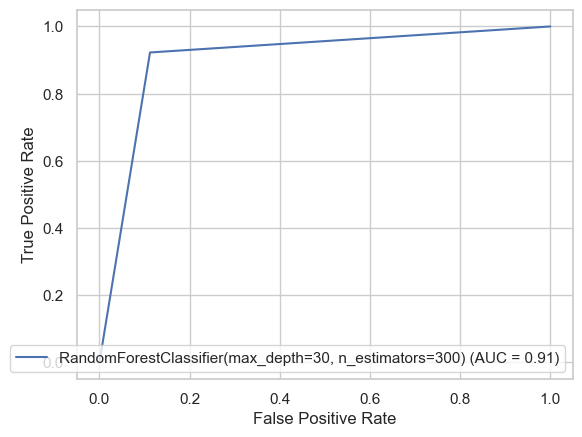

In [96]:
# Calculate the ROC curve and AUC
fpr, tpr, thresolds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a ROC curve display with relevant information
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)

# Plot the ROC curve
display.plot()
plt.show()

## Saving the final model

In [97]:
# Saving the model 
joblib.dump(final_model, "Census_Income_Prediction_Model.pkl")

['Census_Income_Prediction_Model.pkl']

In [98]:
# Loading the saved model
model = joblib.load("Census_Income_Prediction_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [99]:
# Saving the actual values
actual_values = np.array(y_test)

In [100]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

Actual Vlaues  Predicted Values
0                  1                 0
1                  1                 1
2                  1                 1
3                  1                 1
4                  0                 0
...              ...               ...
13889              1                 1
13890              0                 0
13891              0                 1
13892              0                 0
13893              1                 0

[13894 rows x 2 columns]

Here, 0 denotes '<=50K (lower income)' and 1 denotes '>50K (higher income).

# Census Income Prediction Project Documentation
## Project Overview


### Objective
The objective of this project is to predict whether a person makes over $50K a year on the basis of the details provided in the dataset. This prediction involves implementation of classification model.

### Data Source
The dataset used for this project is sourced from a CSV file which contains iformation related to age, work class, education, marital status, occupation, family relationships, race, gender, financial gains and losses, working hours, nationality, income etc. 

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance model performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate model performance. The split is 70% for training and 30% for testing.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
Several machine learning models were employed to predict whether a person makes over $50K a year, including:

Logistic Regression, K-Nearest Neighbors Classifier, Gaussian Naive Bayes Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Extra Trees Classifier, Gradient Boosting Classifier, AdaBoost Classifier, Bagging Classifier, XGBoost Classifier.

Each model mentioned above was trained on the training dataset.

### Model Evaluation and Hyperparameter Tuning

#### Model Evaluation Metrics
The following evaluation metrics were used to assess model performance:

Accuracy: Measures the proportion of correctly classified classes.

Precision: Evaluates the model's ability to correctly predict status.

Recall: Measures the model's ability to identify all actual cases.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Assesses the model's ability to distinguish between actual and predicted cases.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above. Visual representations, such as confusion matrices or ROC curves, were used to aid in model selection.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize model performance.

### Results
#### Final Model Selection
After careful evaluation, the Random Forest Classifier model was selected as the final model to predict whether a person makes over $50K a year due to its superior performance.

### Key Findings
Older individuals tend to have slightly higher incomes.

The type of workclass may have a minor impact on income.

Final weight (Fnlwgt) has a very minor impact on income.

Higher education levels and numeric education representation are associated with slightly higher incomes.

Marital status and the type of relationship have minor impacts on income.

Occupation and gender have good influence on income.

Capital gains have a good impact on income.

Capital losses and native country have minor effects on income.

Working more hours per week has strong influence on income.

### Conclusion
In conclusion, the Census Income Prediction Project has given valuable insights into what factors affect how much money people make. These findings can be incredibly useful for making informed decisions in areas like education, job planning, and social policies.This project lays the foundation for advanced predictive models that can empower organizations and policymakers with a profound understanding of income inequality.